In [82]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.python import keras
import seaborn as sns
from sklearn.decomposition import PCA

In [83]:
nursery_data = pd.read_csv('nursery_data.csv', names=["parents","has_nurs","form","children","housing","finance","social","health","class"])
print(nursery_data.isnull())
nursery_data

       parents  has_nurs   form  children  housing  finance  social  health  \
0        False     False  False     False    False    False   False   False   
1        False     False  False     False    False    False   False   False   
2        False     False  False     False    False    False   False   False   
3        False     False  False     False    False    False   False   False   
4        False     False  False     False    False    False   False   False   
...        ...       ...    ...       ...      ...      ...     ...     ...   
12955    False     False  False     False    False    False   False   False   
12956    False     False  False     False    False    False   False   False   
12957    False     False  False     False    False    False   False   False   
12958    False     False  False     False    False    False   False   False   
12959    False     False  False     False    False    False   False   False   

       class  
0      False  
1      False  
2     

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [86]:
a=[]
a=nursery_data.apply(lambda col: col.corr(nursery_data['class'], method='spearman'), axis=0)
a=a.abs().sort_values(ascending=False)
a

/Users/jutraman/opt/anaconda3/envs/mle_tf/lib/python3.7/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


class       1.000000
health      0.725217
parents     0.106873
children    0.023279
housing     0.018425
finance     0.015044
form        0.013994
has_nurs    0.006445
social      0.000000
dtype: float64

In [87]:
feat = ['finance']
nursery_data = nursery_data.drop(feat, axis = 1)
nursery_data

,parents,has_nurs,form,children,housing,social,health,class
0,usual,proper,complete,1,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,problematic,priority,spec_prior


In [88]:
#Categorical
features = ["children","housing","class","has_nurs","social"]
for column in features:
    nursery_data[column] = nursery_data[column].astype("category").cat.codes
nursery_data

,parents,has_nurs,form,children,housing,social,health,class
0,usual,3,complete,0,0,0,recommended,2
1,usual,3,complete,0,0,0,priority,1
2,usual,3,complete,0,0,0,not_recom,0
3,usual,3,complete,0,0,2,recommended,2
4,usual,3,complete,0,0,2,priority,1
...,...,...,...,...,...,...,...,...
12955,great_pret,4,foster,3,1,2,priority,3
12956,great_pret,4,foster,3,1,2,not_recom,0
12957,great_pret,4,foster,3,1,1,recommended,3
12958,great_pret,4,foster,3,1,1,priority,3


In [89]:
features1 = ['parents','form','health']
x1 = nursery_data.drop(features1, axis = 1)
x1

,has_nurs,children,housing,social,class
0,3,0,0,0,2
1,3,0,0,0,1
2,3,0,0,0,0
3,3,0,0,2,2
4,3,0,0,2,1
...,...,...,...,...,...
12955,4,3,1,2,3
12956,4,3,1,2,0
12957,4,3,1,1,3
12958,4,3,1,1,3


In [91]:
x2 = nursery_data.drop(features, axis = 1)
x2 = pd.get_dummies(x2)

In [92]:
x = pd.concat([x1, x2], axis = 1)
x

,has_nurs,children,housing,social,class,parents_great_pret,parents_pretentious,parents_usual,form_complete,form_completed,form_foster,form_incomplete,health_not_recom,health_priority,health_recommended
0,3,0,0,0,2,0,0,1,1,0,0,0,0,0,1
1,3,0,0,0,1,0,0,1,1,0,0,0,0,1,0
2,3,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,3,0,0,2,2,0,0,1,1,0,0,0,0,0,1
4,3,0,0,2,1,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,4,3,1,2,3,1,0,0,0,0,1,0,0,1,0
12956,4,3,1,2,0,1,0,0,0,0,1,0,1,0,0
12957,4,3,1,1,3,1,0,0,0,0,1,0,0,0,1
12958,4,3,1,1,3,1,0,0,0,0,1,0,0,1,0


In [93]:
a=[]
a=x.apply(lambda col: col.corr(x['class'], method='pearson'), axis=0)
a=a.abs().sort_values(ascending=False)

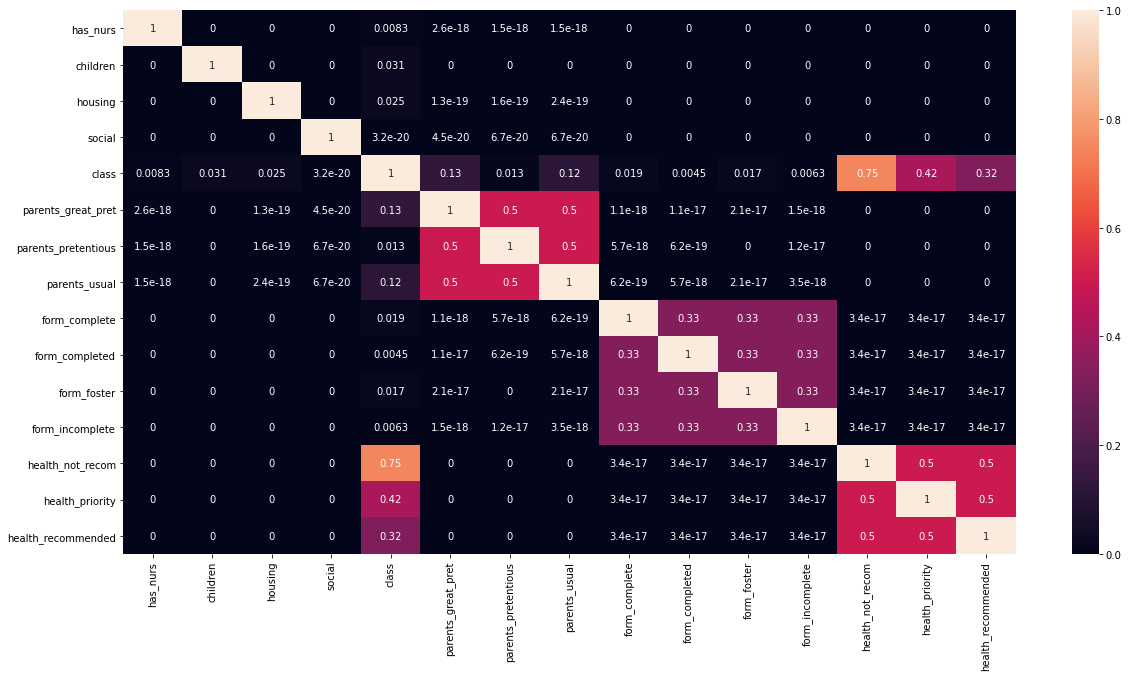

(12960, 15)

In [94]:
corr = abs(x.corr())
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.show()
x.shape

In [95]:
target = ["class"]
X=x.drop(target,axis=1)

In [96]:
target = x[target]
Y = pd.DataFrame(target)
Y = np.array(Y)
Y.shape

(12960, 1)

In [97]:
X.shape

(12960, 14)

In [98]:
pca = PCA(n_components=8)
xtr = pca.fit_transform(X)
xtr.shape

(12960, 8)

In [102]:
model = tf.keras.Sequential([
    keras.layers.Dense(25, input_shape=(14,), activation=tf.nn.tanh),
    keras.layers.Dense(13, activation=tf.nn.tanh),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2)
model.compile(loss='sparse_categorical_crossentropy',
            optimizer=keras.optimizers.Adam(0.000001),
             metrics=['accuracy'])
history = model.fit(xtrain, ytrain, epochs=10000, validation_split=0.1, verbose=2)
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'],'r')
loss, accuracy = model.evaluate(xtest,ytest)
print(accuracy*100)

Train on 9331 samples, validate on 1037 samples
Epoch 1/10000
 - 1s - loss: 1.8105 - acc: 0.1985 - val_loss: 1.7626 - val_acc: 0.2189
Epoch 2/10000
 - 1s - loss: 1.8038 - acc: 0.1998 - val_loss: 1.7561 - val_acc: 0.2208
Epoch 3/10000
 - 0s - loss: 1.7971 - acc: 0.2027 - val_loss: 1.7496 - val_acc: 0.2199
Epoch 4/10000
 - 0s - loss: 1.7904 - acc: 0.2035 - val_loss: 1.7431 - val_acc: 0.2218
Epoch 5/10000
 - 0s - loss: 1.7838 - acc: 0.2047 - val_loss: 1.7367 - val_acc: 0.2218
Epoch 6/10000
 - 1s - loss: 1.7772 - acc: 0.2057 - val_loss: 1.7303 - val_acc: 0.2247
Epoch 7/10000
 - 1s - loss: 1.7706 - acc: 0.2066 - val_loss: 1.7239 - val_acc: 0.2276
Epoch 8/10000
 - 1s - loss: 1.7641 - acc: 0.2071 - val_loss: 1.7175 - val_acc: 0.2295
Epoch 9/10000
 - 1s - loss: 1.7576 - acc: 0.2086 - val_loss: 1.7112 - val_acc: 0.2305
Epoch 10/10000
 - 1s - loss: 1.7511 - acc: 0.2099 - val_loss: 1.7050 - val_acc: 0.2324
Epoch 11/10000
 - 0s - loss: 1.7447 - acc: 0.2110 - val_loss: 1.6987 - val_acc: 0.2314
Epoc

Epoch 95/10000
 - 1s - loss: 1.3342 - acc: 0.3661 - val_loss: 1.3080 - val_acc: 0.3973
Epoch 96/10000
 - 1s - loss: 1.3309 - acc: 0.3677 - val_loss: 1.3049 - val_acc: 0.3973
Epoch 97/10000
 - 1s - loss: 1.3276 - acc: 0.3697 - val_loss: 1.3018 - val_acc: 0.3973
Epoch 98/10000
 - 0s - loss: 1.3243 - acc: 0.3712 - val_loss: 1.2987 - val_acc: 0.3983
Epoch 99/10000
 - 1s - loss: 1.3210 - acc: 0.3731 - val_loss: 1.2957 - val_acc: 0.4050
Epoch 100/10000
 - 1s - loss: 1.3178 - acc: 0.3760 - val_loss: 1.2926 - val_acc: 0.4089
Epoch 101/10000
 - 0s - loss: 1.3146 - acc: 0.3787 - val_loss: 1.2897 - val_acc: 0.4098
Epoch 102/10000
 - 1s - loss: 1.3114 - acc: 0.3816 - val_loss: 1.2867 - val_acc: 0.4118
Epoch 103/10000
 - 0s - loss: 1.3083 - acc: 0.3829 - val_loss: 1.2838 - val_acc: 0.4137
Epoch 104/10000
 - 1s - loss: 1.3052 - acc: 0.3839 - val_loss: 1.2809 - val_acc: 0.4156
Epoch 105/10000
 - 1s - loss: 1.3021 - acc: 0.3855 - val_loss: 1.2780 - val_acc: 0.4195
Epoch 106/10000
 - 1s - loss: 1.2990 

 - 0s - loss: 1.1191 - acc: 0.5962 - val_loss: 1.1066 - val_acc: 0.6114
Epoch 189/10000
 - 1s - loss: 1.1175 - acc: 0.5977 - val_loss: 1.1051 - val_acc: 0.6143
Epoch 190/10000
 - 1s - loss: 1.1159 - acc: 0.5992 - val_loss: 1.1035 - val_acc: 0.6143
Epoch 191/10000
 - 1s - loss: 1.1143 - acc: 0.6002 - val_loss: 1.1020 - val_acc: 0.6181
Epoch 192/10000
 - 0s - loss: 1.1127 - acc: 0.6021 - val_loss: 1.1005 - val_acc: 0.6220
Epoch 193/10000
 - 0s - loss: 1.1111 - acc: 0.6034 - val_loss: 1.0990 - val_acc: 0.6239
Epoch 194/10000
 - 1s - loss: 1.1095 - acc: 0.6055 - val_loss: 1.0975 - val_acc: 0.6287
Epoch 195/10000
 - 1s - loss: 1.1080 - acc: 0.6069 - val_loss: 1.0960 - val_acc: 0.6297
Epoch 196/10000
 - 1s - loss: 1.1064 - acc: 0.6086 - val_loss: 1.0945 - val_acc: 0.6316
Epoch 197/10000
 - 1s - loss: 1.1048 - acc: 0.6103 - val_loss: 1.0930 - val_acc: 0.6345
Epoch 198/10000
 - 1s - loss: 1.1033 - acc: 0.6118 - val_loss: 1.0915 - val_acc: 0.6355
Epoch 199/10000
 - 1s - loss: 1.1017 - acc: 0.61

Epoch 282/10000
 - 1s - loss: 0.9869 - acc: 0.7046 - val_loss: 0.9783 - val_acc: 0.7175
Epoch 283/10000
 - 1s - loss: 0.9856 - acc: 0.7062 - val_loss: 0.9770 - val_acc: 0.7203
Epoch 284/10000
 - 1s - loss: 0.9843 - acc: 0.7075 - val_loss: 0.9757 - val_acc: 0.7232
Epoch 285/10000
 - 1s - loss: 0.9830 - acc: 0.7086 - val_loss: 0.9745 - val_acc: 0.7252
Epoch 286/10000
 - 1s - loss: 0.9817 - acc: 0.7089 - val_loss: 0.9732 - val_acc: 0.7261
Epoch 287/10000
 - 0s - loss: 0.9804 - acc: 0.7092 - val_loss: 0.9719 - val_acc: 0.7252
Epoch 288/10000
 - 1s - loss: 0.9791 - acc: 0.7097 - val_loss: 0.9706 - val_acc: 0.7261
Epoch 289/10000
 - 1s - loss: 0.9778 - acc: 0.7098 - val_loss: 0.9694 - val_acc: 0.7252
Epoch 290/10000
 - 1s - loss: 0.9765 - acc: 0.7103 - val_loss: 0.9681 - val_acc: 0.7261
Epoch 291/10000
 - 1s - loss: 0.9752 - acc: 0.7107 - val_loss: 0.9668 - val_acc: 0.7261
Epoch 292/10000
 - 1s - loss: 0.9740 - acc: 0.7114 - val_loss: 0.9655 - val_acc: 0.7261
Epoch 293/10000
 - 1s - loss: 0.

 - 1s - loss: 0.8684 - acc: 0.7423 - val_loss: 0.8612 - val_acc: 0.7541
Epoch 376/10000
 - 1s - loss: 0.8672 - acc: 0.7423 - val_loss: 0.8600 - val_acc: 0.7541
Epoch 377/10000
 - 1s - loss: 0.8659 - acc: 0.7425 - val_loss: 0.8588 - val_acc: 0.7541
Epoch 378/10000
 - 1s - loss: 0.8647 - acc: 0.7431 - val_loss: 0.8575 - val_acc: 0.7541
Epoch 379/10000
 - 0s - loss: 0.8635 - acc: 0.7432 - val_loss: 0.8563 - val_acc: 0.7551
Epoch 380/10000
 - 1s - loss: 0.8622 - acc: 0.7432 - val_loss: 0.8551 - val_acc: 0.7551
Epoch 381/10000
 - 1s - loss: 0.8610 - acc: 0.7434 - val_loss: 0.8539 - val_acc: 0.7551
Epoch 382/10000
 - 0s - loss: 0.8597 - acc: 0.7439 - val_loss: 0.8526 - val_acc: 0.7551
Epoch 383/10000
 - 1s - loss: 0.8585 - acc: 0.7441 - val_loss: 0.8514 - val_acc: 0.7551
Epoch 384/10000
 - 0s - loss: 0.8572 - acc: 0.7441 - val_loss: 0.8502 - val_acc: 0.7551
Epoch 385/10000
 - 1s - loss: 0.8560 - acc: 0.7442 - val_loss: 0.8489 - val_acc: 0.7551
Epoch 386/10000
 - 1s - loss: 0.8548 - acc: 0.74

Epoch 469/10000
 - 0s - loss: 0.7564 - acc: 0.7544 - val_loss: 0.7507 - val_acc: 0.7686
Epoch 470/10000
 - 0s - loss: 0.7553 - acc: 0.7544 - val_loss: 0.7497 - val_acc: 0.7686
Epoch 471/10000
 - 0s - loss: 0.7542 - acc: 0.7545 - val_loss: 0.7486 - val_acc: 0.7686
Epoch 472/10000
 - 0s - loss: 0.7531 - acc: 0.7542 - val_loss: 0.7475 - val_acc: 0.7686
Epoch 473/10000
 - 0s - loss: 0.7520 - acc: 0.7546 - val_loss: 0.7464 - val_acc: 0.7695
Epoch 474/10000
 - 0s - loss: 0.7509 - acc: 0.7546 - val_loss: 0.7453 - val_acc: 0.7695
Epoch 475/10000
 - 0s - loss: 0.7498 - acc: 0.7544 - val_loss: 0.7442 - val_acc: 0.7695
Epoch 476/10000
 - 0s - loss: 0.7487 - acc: 0.7545 - val_loss: 0.7432 - val_acc: 0.7695
Epoch 477/10000
 - 0s - loss: 0.7476 - acc: 0.7550 - val_loss: 0.7421 - val_acc: 0.7695
Epoch 478/10000
 - 1s - loss: 0.7465 - acc: 0.7551 - val_loss: 0.7410 - val_acc: 0.7695
Epoch 479/10000
 - 1s - loss: 0.7455 - acc: 0.7555 - val_loss: 0.7400 - val_acc: 0.7695
Epoch 480/10000
 - 0s - loss: 0.

 - 0s - loss: 0.6649 - acc: 0.7619 - val_loss: 0.6609 - val_acc: 0.7705
Epoch 563/10000
 - 0s - loss: 0.6641 - acc: 0.7619 - val_loss: 0.6601 - val_acc: 0.7705
Epoch 564/10000
 - 0s - loss: 0.6633 - acc: 0.7621 - val_loss: 0.6593 - val_acc: 0.7705
Epoch 565/10000
 - 0s - loss: 0.6624 - acc: 0.7618 - val_loss: 0.6584 - val_acc: 0.7715
Epoch 566/10000
 - 0s - loss: 0.6616 - acc: 0.7619 - val_loss: 0.6576 - val_acc: 0.7705
Epoch 567/10000
 - 0s - loss: 0.6608 - acc: 0.7620 - val_loss: 0.6568 - val_acc: 0.7705
Epoch 568/10000
 - 1s - loss: 0.6599 - acc: 0.7619 - val_loss: 0.6560 - val_acc: 0.7705
Epoch 569/10000
 - 1s - loss: 0.6591 - acc: 0.7620 - val_loss: 0.6552 - val_acc: 0.7705
Epoch 570/10000
 - 0s - loss: 0.6583 - acc: 0.7619 - val_loss: 0.6544 - val_acc: 0.7705
Epoch 571/10000
 - 0s - loss: 0.6575 - acc: 0.7625 - val_loss: 0.6536 - val_acc: 0.7705
Epoch 572/10000
 - 0s - loss: 0.6567 - acc: 0.7625 - val_loss: 0.6528 - val_acc: 0.7705
Epoch 573/10000
 - 0s - loss: 0.6559 - acc: 0.76

Epoch 656/10000
 - 0s - loss: 0.5995 - acc: 0.7671 - val_loss: 0.5967 - val_acc: 0.7792
Epoch 657/10000
 - 0s - loss: 0.5990 - acc: 0.7673 - val_loss: 0.5961 - val_acc: 0.7811
Epoch 658/10000
 - 0s - loss: 0.5984 - acc: 0.7673 - val_loss: 0.5956 - val_acc: 0.7821
Epoch 659/10000
 - 1s - loss: 0.5978 - acc: 0.7675 - val_loss: 0.5950 - val_acc: 0.7821
Epoch 660/10000
 - 0s - loss: 0.5973 - acc: 0.7677 - val_loss: 0.5945 - val_acc: 0.7821
Epoch 661/10000
 - 0s - loss: 0.5967 - acc: 0.7674 - val_loss: 0.5939 - val_acc: 0.7821
Epoch 662/10000
 - 0s - loss: 0.5962 - acc: 0.7678 - val_loss: 0.5934 - val_acc: 0.7811
Epoch 663/10000
 - 0s - loss: 0.5956 - acc: 0.7679 - val_loss: 0.5928 - val_acc: 0.7821
Epoch 664/10000
 - 0s - loss: 0.5951 - acc: 0.7679 - val_loss: 0.5923 - val_acc: 0.7821
Epoch 665/10000
 - 0s - loss: 0.5946 - acc: 0.7682 - val_loss: 0.5918 - val_acc: 0.7821
Epoch 666/10000
 - 0s - loss: 0.5940 - acc: 0.7683 - val_loss: 0.5912 - val_acc: 0.7821
Epoch 667/10000
 - 0s - loss: 0.

 - 0s - loss: 0.5575 - acc: 0.7716 - val_loss: 0.5550 - val_acc: 0.7859
Epoch 750/10000
 - 0s - loss: 0.5572 - acc: 0.7716 - val_loss: 0.5546 - val_acc: 0.7859
Epoch 751/10000
 - 1s - loss: 0.5568 - acc: 0.7717 - val_loss: 0.5543 - val_acc: 0.7859
Epoch 752/10000
 - 0s - loss: 0.5565 - acc: 0.7718 - val_loss: 0.5539 - val_acc: 0.7859
Epoch 753/10000
 - 0s - loss: 0.5561 - acc: 0.7719 - val_loss: 0.5536 - val_acc: 0.7859
Epoch 754/10000
 - 0s - loss: 0.5558 - acc: 0.7722 - val_loss: 0.5532 - val_acc: 0.7859
Epoch 755/10000
 - 0s - loss: 0.5554 - acc: 0.7719 - val_loss: 0.5529 - val_acc: 0.7859
Epoch 756/10000
 - 0s - loss: 0.5551 - acc: 0.7718 - val_loss: 0.5525 - val_acc: 0.7859
Epoch 757/10000
 - 0s - loss: 0.5547 - acc: 0.7721 - val_loss: 0.5522 - val_acc: 0.7859
Epoch 758/10000
 - 0s - loss: 0.5544 - acc: 0.7722 - val_loss: 0.5518 - val_acc: 0.7869
Epoch 759/10000
 - 0s - loss: 0.5540 - acc: 0.7721 - val_loss: 0.5515 - val_acc: 0.7869
Epoch 760/10000
 - 0s - loss: 0.5537 - acc: 0.77

Epoch 843/10000
 - 1s - loss: 0.5299 - acc: 0.7763 - val_loss: 0.5270 - val_acc: 0.7898
Epoch 844/10000
 - 0s - loss: 0.5297 - acc: 0.7764 - val_loss: 0.5268 - val_acc: 0.7898
Epoch 845/10000
 - 1s - loss: 0.5294 - acc: 0.7766 - val_loss: 0.5266 - val_acc: 0.7898
Epoch 846/10000
 - 1s - loss: 0.5292 - acc: 0.7767 - val_loss: 0.5263 - val_acc: 0.7898
Epoch 847/10000
 - 0s - loss: 0.5290 - acc: 0.7767 - val_loss: 0.5261 - val_acc: 0.7898
Epoch 848/10000
 - 0s - loss: 0.5287 - acc: 0.7769 - val_loss: 0.5258 - val_acc: 0.7898
Epoch 849/10000
 - 0s - loss: 0.5285 - acc: 0.7769 - val_loss: 0.5256 - val_acc: 0.7898
Epoch 850/10000
 - 0s - loss: 0.5283 - acc: 0.7767 - val_loss: 0.5253 - val_acc: 0.7898
Epoch 851/10000
 - 0s - loss: 0.5280 - acc: 0.7767 - val_loss: 0.5251 - val_acc: 0.7898
Epoch 852/10000
 - 0s - loss: 0.5278 - acc: 0.7766 - val_loss: 0.5249 - val_acc: 0.7898
Epoch 853/10000
 - 0s - loss: 0.5276 - acc: 0.7769 - val_loss: 0.5246 - val_acc: 0.7898
Epoch 854/10000
 - 1s - loss: 0.

 - 0s - loss: 0.5107 - acc: 0.7796 - val_loss: 0.5071 - val_acc: 0.7907
Epoch 937/10000
 - 0s - loss: 0.5106 - acc: 0.7799 - val_loss: 0.5069 - val_acc: 0.7907
Epoch 938/10000
 - 1s - loss: 0.5104 - acc: 0.7798 - val_loss: 0.5067 - val_acc: 0.7907
Epoch 939/10000
 - 0s - loss: 0.5102 - acc: 0.7799 - val_loss: 0.5065 - val_acc: 0.7907
Epoch 940/10000
 - 0s - loss: 0.5100 - acc: 0.7799 - val_loss: 0.5063 - val_acc: 0.7917
Epoch 941/10000
 - 0s - loss: 0.5099 - acc: 0.7799 - val_loss: 0.5062 - val_acc: 0.7917
Epoch 942/10000
 - 1s - loss: 0.5097 - acc: 0.7798 - val_loss: 0.5060 - val_acc: 0.7907
Epoch 943/10000
 - 1s - loss: 0.5095 - acc: 0.7798 - val_loss: 0.5058 - val_acc: 0.7917
Epoch 944/10000
 - 1s - loss: 0.5093 - acc: 0.7799 - val_loss: 0.5056 - val_acc: 0.7917
Epoch 945/10000
 - 0s - loss: 0.5091 - acc: 0.7798 - val_loss: 0.5054 - val_acc: 0.7907
Epoch 946/10000
 - 0s - loss: 0.5090 - acc: 0.7798 - val_loss: 0.5052 - val_acc: 0.7907
Epoch 947/10000
 - 0s - loss: 0.5088 - acc: 0.77

Epoch 1029/10000
 - 0s - loss: 0.4958 - acc: 0.7848 - val_loss: 0.4913 - val_acc: 0.7975
Epoch 1030/10000
 - 0s - loss: 0.4957 - acc: 0.7847 - val_loss: 0.4911 - val_acc: 0.7975
Epoch 1031/10000
 - 0s - loss: 0.4955 - acc: 0.7846 - val_loss: 0.4909 - val_acc: 0.7975
Epoch 1032/10000
 - 0s - loss: 0.4954 - acc: 0.7849 - val_loss: 0.4908 - val_acc: 0.7985
Epoch 1033/10000
 - 0s - loss: 0.4952 - acc: 0.7848 - val_loss: 0.4906 - val_acc: 0.7985
Epoch 1034/10000
 - 0s - loss: 0.4951 - acc: 0.7848 - val_loss: 0.4905 - val_acc: 0.7985
Epoch 1035/10000
 - 0s - loss: 0.4950 - acc: 0.7848 - val_loss: 0.4903 - val_acc: 0.7985
Epoch 1036/10000
 - 0s - loss: 0.4948 - acc: 0.7848 - val_loss: 0.4902 - val_acc: 0.7985
Epoch 1037/10000
 - 0s - loss: 0.4947 - acc: 0.7851 - val_loss: 0.4900 - val_acc: 0.7985
Epoch 1038/10000
 - 0s - loss: 0.4945 - acc: 0.7851 - val_loss: 0.4899 - val_acc: 0.7985
Epoch 1039/10000
 - 0s - loss: 0.4944 - acc: 0.7852 - val_loss: 0.4897 - val_acc: 0.7994
Epoch 1040/10000
 - 0

 - 0s - loss: 0.4833 - acc: 0.7872 - val_loss: 0.4779 - val_acc: 0.8033
Epoch 1122/10000
 - 0s - loss: 0.4832 - acc: 0.7877 - val_loss: 0.4778 - val_acc: 0.8033
Epoch 1123/10000
 - 0s - loss: 0.4831 - acc: 0.7878 - val_loss: 0.4776 - val_acc: 0.8033
Epoch 1124/10000
 - 0s - loss: 0.4830 - acc: 0.7878 - val_loss: 0.4775 - val_acc: 0.8033
Epoch 1125/10000
 - 0s - loss: 0.4828 - acc: 0.7877 - val_loss: 0.4774 - val_acc: 0.8033
Epoch 1126/10000
 - 0s - loss: 0.4827 - acc: 0.7876 - val_loss: 0.4772 - val_acc: 0.8033
Epoch 1127/10000
 - 0s - loss: 0.4826 - acc: 0.7875 - val_loss: 0.4771 - val_acc: 0.8033
Epoch 1128/10000
 - 1s - loss: 0.4824 - acc: 0.7876 - val_loss: 0.4770 - val_acc: 0.8033
Epoch 1129/10000
 - 0s - loss: 0.4823 - acc: 0.7879 - val_loss: 0.4768 - val_acc: 0.8033
Epoch 1130/10000
 - 1s - loss: 0.4822 - acc: 0.7878 - val_loss: 0.4767 - val_acc: 0.8033
Epoch 1131/10000
 - 0s - loss: 0.4821 - acc: 0.7880 - val_loss: 0.4766 - val_acc: 0.8033
Epoch 1132/10000
 - 1s - loss: 0.4819 

Epoch 1214/10000
 - 0s - loss: 0.4721 - acc: 0.7912 - val_loss: 0.4660 - val_acc: 0.8052
Epoch 1215/10000
 - 0s - loss: 0.4719 - acc: 0.7914 - val_loss: 0.4658 - val_acc: 0.8052
Epoch 1216/10000
 - 0s - loss: 0.4718 - acc: 0.7914 - val_loss: 0.4657 - val_acc: 0.8052
Epoch 1217/10000
 - 0s - loss: 0.4717 - acc: 0.7917 - val_loss: 0.4656 - val_acc: 0.8052
Epoch 1218/10000
 - 0s - loss: 0.4716 - acc: 0.7913 - val_loss: 0.4655 - val_acc: 0.8052
Epoch 1219/10000
 - 0s - loss: 0.4715 - acc: 0.7917 - val_loss: 0.4654 - val_acc: 0.8052
Epoch 1220/10000
 - 0s - loss: 0.4714 - acc: 0.7920 - val_loss: 0.4652 - val_acc: 0.8052
Epoch 1221/10000
 - 1s - loss: 0.4712 - acc: 0.7920 - val_loss: 0.4651 - val_acc: 0.8052
Epoch 1222/10000
 - 1s - loss: 0.4711 - acc: 0.7921 - val_loss: 0.4650 - val_acc: 0.8052
Epoch 1223/10000
 - 1s - loss: 0.4710 - acc: 0.7921 - val_loss: 0.4649 - val_acc: 0.8052
Epoch 1224/10000
 - 0s - loss: 0.4709 - acc: 0.7923 - val_loss: 0.4648 - val_acc: 0.8052
Epoch 1225/10000
 - 0

 - 1s - loss: 0.4617 - acc: 0.7959 - val_loss: 0.4553 - val_acc: 0.8091
Epoch 1307/10000
 - 1s - loss: 0.4616 - acc: 0.7958 - val_loss: 0.4551 - val_acc: 0.8091
Epoch 1308/10000
 - 1s - loss: 0.4615 - acc: 0.7962 - val_loss: 0.4550 - val_acc: 0.8091
Epoch 1309/10000
 - 1s - loss: 0.4614 - acc: 0.7967 - val_loss: 0.4549 - val_acc: 0.8091
Epoch 1310/10000
 - 1s - loss: 0.4613 - acc: 0.7968 - val_loss: 0.4548 - val_acc: 0.8091
Epoch 1311/10000
 - 1s - loss: 0.4612 - acc: 0.7969 - val_loss: 0.4547 - val_acc: 0.8091
Epoch 1312/10000
 - 1s - loss: 0.4611 - acc: 0.7969 - val_loss: 0.4546 - val_acc: 0.8091
Epoch 1313/10000
 - 1s - loss: 0.4610 - acc: 0.7970 - val_loss: 0.4545 - val_acc: 0.8091
Epoch 1314/10000
 - 1s - loss: 0.4609 - acc: 0.7970 - val_loss: 0.4544 - val_acc: 0.8091
Epoch 1315/10000
 - 0s - loss: 0.4608 - acc: 0.7970 - val_loss: 0.4543 - val_acc: 0.8091
Epoch 1316/10000
 - 1s - loss: 0.4607 - acc: 0.7970 - val_loss: 0.4541 - val_acc: 0.8091
Epoch 1317/10000
 - 0s - loss: 0.4605 

Epoch 1399/10000
 - 1s - loss: 0.4519 - acc: 0.8022 - val_loss: 0.4453 - val_acc: 0.8091
Epoch 1400/10000
 - 1s - loss: 0.4518 - acc: 0.8023 - val_loss: 0.4452 - val_acc: 0.8091
Epoch 1401/10000
 - 1s - loss: 0.4517 - acc: 0.8023 - val_loss: 0.4451 - val_acc: 0.8091
Epoch 1402/10000
 - 0s - loss: 0.4516 - acc: 0.8023 - val_loss: 0.4450 - val_acc: 0.8091
Epoch 1403/10000
 - 0s - loss: 0.4515 - acc: 0.8023 - val_loss: 0.4449 - val_acc: 0.8091
Epoch 1404/10000
 - 1s - loss: 0.4514 - acc: 0.8024 - val_loss: 0.4448 - val_acc: 0.8091
Epoch 1405/10000
 - 1s - loss: 0.4513 - acc: 0.8027 - val_loss: 0.4447 - val_acc: 0.8091
Epoch 1406/10000
 - 1s - loss: 0.4512 - acc: 0.8028 - val_loss: 0.4446 - val_acc: 0.8091
Epoch 1407/10000
 - 1s - loss: 0.4511 - acc: 0.8028 - val_loss: 0.4444 - val_acc: 0.8091
Epoch 1408/10000
 - 0s - loss: 0.4510 - acc: 0.8028 - val_loss: 0.4443 - val_acc: 0.8100
Epoch 1409/10000
 - 1s - loss: 0.4509 - acc: 0.8028 - val_loss: 0.4442 - val_acc: 0.8100
Epoch 1410/10000
 - 0

 - 1s - loss: 0.4426 - acc: 0.8075 - val_loss: 0.4361 - val_acc: 0.8149
Epoch 1492/10000
 - 0s - loss: 0.4425 - acc: 0.8075 - val_loss: 0.4360 - val_acc: 0.8149
Epoch 1493/10000
 - 1s - loss: 0.4424 - acc: 0.8076 - val_loss: 0.4359 - val_acc: 0.8149
Epoch 1494/10000
 - 0s - loss: 0.4423 - acc: 0.8076 - val_loss: 0.4358 - val_acc: 0.8149
Epoch 1495/10000
 - 0s - loss: 0.4422 - acc: 0.8076 - val_loss: 0.4357 - val_acc: 0.8149
Epoch 1496/10000
 - 0s - loss: 0.4421 - acc: 0.8076 - val_loss: 0.4356 - val_acc: 0.8149
Epoch 1497/10000
 - 0s - loss: 0.4420 - acc: 0.8076 - val_loss: 0.4355 - val_acc: 0.8149
Epoch 1498/10000
 - 0s - loss: 0.4419 - acc: 0.8077 - val_loss: 0.4354 - val_acc: 0.8149
Epoch 1499/10000
 - 0s - loss: 0.4418 - acc: 0.8078 - val_loss: 0.4353 - val_acc: 0.8139
Epoch 1500/10000
 - 0s - loss: 0.4417 - acc: 0.8078 - val_loss: 0.4352 - val_acc: 0.8139
Epoch 1501/10000
 - 1s - loss: 0.4416 - acc: 0.8080 - val_loss: 0.4351 - val_acc: 0.8139
Epoch 1502/10000
 - 0s - loss: 0.4415 

Epoch 1584/10000
 - 0s - loss: 0.4334 - acc: 0.8112 - val_loss: 0.4273 - val_acc: 0.8187
Epoch 1585/10000
 - 1s - loss: 0.4333 - acc: 0.8112 - val_loss: 0.4272 - val_acc: 0.8187
Epoch 1586/10000
 - 0s - loss: 0.4332 - acc: 0.8113 - val_loss: 0.4271 - val_acc: 0.8187
Epoch 1587/10000
 - 0s - loss: 0.4331 - acc: 0.8112 - val_loss: 0.4270 - val_acc: 0.8187
Epoch 1588/10000
 - 0s - loss: 0.4331 - acc: 0.8114 - val_loss: 0.4269 - val_acc: 0.8187
Epoch 1589/10000
 - 0s - loss: 0.4330 - acc: 0.8112 - val_loss: 0.4268 - val_acc: 0.8187
Epoch 1590/10000
 - 0s - loss: 0.4329 - acc: 0.8115 - val_loss: 0.4267 - val_acc: 0.8187
Epoch 1591/10000
 - 0s - loss: 0.4328 - acc: 0.8114 - val_loss: 0.4266 - val_acc: 0.8187
Epoch 1592/10000
 - 0s - loss: 0.4327 - acc: 0.8115 - val_loss: 0.4265 - val_acc: 0.8187
Epoch 1593/10000
 - 0s - loss: 0.4326 - acc: 0.8116 - val_loss: 0.4264 - val_acc: 0.8187
Epoch 1594/10000
 - 0s - loss: 0.4325 - acc: 0.8115 - val_loss: 0.4263 - val_acc: 0.8187
Epoch 1595/10000
 - 0

 - 0s - loss: 0.4247 - acc: 0.8158 - val_loss: 0.4190 - val_acc: 0.8235
Epoch 1677/10000
 - 0s - loss: 0.4246 - acc: 0.8157 - val_loss: 0.4189 - val_acc: 0.8235
Epoch 1678/10000
 - 0s - loss: 0.4245 - acc: 0.8157 - val_loss: 0.4188 - val_acc: 0.8235
Epoch 1679/10000
 - 0s - loss: 0.4244 - acc: 0.8159 - val_loss: 0.4187 - val_acc: 0.8235
Epoch 1680/10000
 - 0s - loss: 0.4243 - acc: 0.8159 - val_loss: 0.4186 - val_acc: 0.8235
Epoch 1681/10000
 - 0s - loss: 0.4242 - acc: 0.8160 - val_loss: 0.4186 - val_acc: 0.8235
Epoch 1682/10000
 - 0s - loss: 0.4241 - acc: 0.8161 - val_loss: 0.4185 - val_acc: 0.8245
Epoch 1683/10000
 - 0s - loss: 0.4240 - acc: 0.8161 - val_loss: 0.4184 - val_acc: 0.8245
Epoch 1684/10000
 - 0s - loss: 0.4240 - acc: 0.8162 - val_loss: 0.4183 - val_acc: 0.8255
Epoch 1685/10000
 - 0s - loss: 0.4239 - acc: 0.8162 - val_loss: 0.4182 - val_acc: 0.8255
Epoch 1686/10000
 - 0s - loss: 0.4238 - acc: 0.8162 - val_loss: 0.4181 - val_acc: 0.8255
Epoch 1687/10000
 - 0s - loss: 0.4237 

Epoch 1769/10000
 - 0s - loss: 0.4161 - acc: 0.8196 - val_loss: 0.4110 - val_acc: 0.8303
Epoch 1770/10000
 - 0s - loss: 0.4160 - acc: 0.8200 - val_loss: 0.4109 - val_acc: 0.8303
Epoch 1771/10000
 - 0s - loss: 0.4159 - acc: 0.8197 - val_loss: 0.4108 - val_acc: 0.8303
Epoch 1772/10000
 - 0s - loss: 0.4158 - acc: 0.8198 - val_loss: 0.4107 - val_acc: 0.8303
Epoch 1773/10000
 - 0s - loss: 0.4157 - acc: 0.8201 - val_loss: 0.4106 - val_acc: 0.8303
Epoch 1774/10000
 - 0s - loss: 0.4156 - acc: 0.8201 - val_loss: 0.4105 - val_acc: 0.8303
Epoch 1775/10000
 - 0s - loss: 0.4155 - acc: 0.8205 - val_loss: 0.4104 - val_acc: 0.8312
Epoch 1776/10000
 - 0s - loss: 0.4154 - acc: 0.8206 - val_loss: 0.4104 - val_acc: 0.8312
Epoch 1777/10000
 - 0s - loss: 0.4153 - acc: 0.8207 - val_loss: 0.4103 - val_acc: 0.8312
Epoch 1778/10000
 - 0s - loss: 0.4152 - acc: 0.8209 - val_loss: 0.4102 - val_acc: 0.8312
Epoch 1779/10000
 - 0s - loss: 0.4152 - acc: 0.8211 - val_loss: 0.4101 - val_acc: 0.8312
Epoch 1780/10000
 - 0

 - 0s - loss: 0.4078 - acc: 0.8264 - val_loss: 0.4033 - val_acc: 0.8370
Epoch 1862/10000
 - 0s - loss: 0.4077 - acc: 0.8263 - val_loss: 0.4032 - val_acc: 0.8370
Epoch 1863/10000
 - 0s - loss: 0.4076 - acc: 0.8265 - val_loss: 0.4032 - val_acc: 0.8370
Epoch 1864/10000
 - 0s - loss: 0.4075 - acc: 0.8263 - val_loss: 0.4031 - val_acc: 0.8370
Epoch 1865/10000
 - 0s - loss: 0.4074 - acc: 0.8265 - val_loss: 0.4030 - val_acc: 0.8370
Epoch 1866/10000
 - 0s - loss: 0.4073 - acc: 0.8265 - val_loss: 0.4029 - val_acc: 0.8370
Epoch 1867/10000
 - 1s - loss: 0.4072 - acc: 0.8266 - val_loss: 0.4028 - val_acc: 0.8370
Epoch 1868/10000
 - 0s - loss: 0.4071 - acc: 0.8266 - val_loss: 0.4027 - val_acc: 0.8370
Epoch 1869/10000
 - 0s - loss: 0.4070 - acc: 0.8265 - val_loss: 0.4027 - val_acc: 0.8370
Epoch 1870/10000
 - 0s - loss: 0.4070 - acc: 0.8268 - val_loss: 0.4026 - val_acc: 0.8370
Epoch 1871/10000
 - 0s - loss: 0.4069 - acc: 0.8265 - val_loss: 0.4025 - val_acc: 0.8370
Epoch 1872/10000
 - 0s - loss: 0.4068 

Epoch 1954/10000
 - 0s - loss: 0.3995 - acc: 0.8313 - val_loss: 0.3958 - val_acc: 0.8399
Epoch 1955/10000
 - 0s - loss: 0.3994 - acc: 0.8313 - val_loss: 0.3958 - val_acc: 0.8399
Epoch 1956/10000
 - 0s - loss: 0.3994 - acc: 0.8314 - val_loss: 0.3957 - val_acc: 0.8399
Epoch 1957/10000
 - 0s - loss: 0.3993 - acc: 0.8314 - val_loss: 0.3956 - val_acc: 0.8399
Epoch 1958/10000
 - 0s - loss: 0.3992 - acc: 0.8316 - val_loss: 0.3955 - val_acc: 0.8399
Epoch 1959/10000
 - 0s - loss: 0.3991 - acc: 0.8316 - val_loss: 0.3954 - val_acc: 0.8399
Epoch 1960/10000
 - 0s - loss: 0.3990 - acc: 0.8316 - val_loss: 0.3954 - val_acc: 0.8399
Epoch 1961/10000
 - 0s - loss: 0.3989 - acc: 0.8317 - val_loss: 0.3953 - val_acc: 0.8399
Epoch 1962/10000
 - 0s - loss: 0.3988 - acc: 0.8320 - val_loss: 0.3952 - val_acc: 0.8399
Epoch 1963/10000
 - 0s - loss: 0.3987 - acc: 0.8319 - val_loss: 0.3951 - val_acc: 0.8399
Epoch 1964/10000
 - 0s - loss: 0.3987 - acc: 0.8320 - val_loss: 0.3951 - val_acc: 0.8399
Epoch 1965/10000
 - 0

 - 0s - loss: 0.3916 - acc: 0.8369 - val_loss: 0.3887 - val_acc: 0.8467
Epoch 2047/10000
 - 0s - loss: 0.3915 - acc: 0.8370 - val_loss: 0.3886 - val_acc: 0.8467
Epoch 2048/10000
 - 0s - loss: 0.3914 - acc: 0.8368 - val_loss: 0.3885 - val_acc: 0.8467
Epoch 2049/10000
 - 0s - loss: 0.3913 - acc: 0.8368 - val_loss: 0.3884 - val_acc: 0.8467
Epoch 2050/10000
 - 0s - loss: 0.3912 - acc: 0.8369 - val_loss: 0.3884 - val_acc: 0.8467
Epoch 2051/10000
 - 0s - loss: 0.3911 - acc: 0.8371 - val_loss: 0.3883 - val_acc: 0.8467
Epoch 2052/10000
 - 0s - loss: 0.3911 - acc: 0.8371 - val_loss: 0.3882 - val_acc: 0.8467
Epoch 2053/10000
 - 0s - loss: 0.3910 - acc: 0.8371 - val_loss: 0.3881 - val_acc: 0.8467
Epoch 2054/10000
 - 0s - loss: 0.3909 - acc: 0.8371 - val_loss: 0.3881 - val_acc: 0.8467
Epoch 2055/10000
 - 0s - loss: 0.3908 - acc: 0.8373 - val_loss: 0.3880 - val_acc: 0.8467
Epoch 2056/10000
 - 0s - loss: 0.3907 - acc: 0.8373 - val_loss: 0.3879 - val_acc: 0.8467
Epoch 2057/10000
 - 0s - loss: 0.3906 

Epoch 2139/10000
 - 0s - loss: 0.3837 - acc: 0.8433 - val_loss: 0.3816 - val_acc: 0.8554
Epoch 2140/10000
 - 0s - loss: 0.3836 - acc: 0.8434 - val_loss: 0.3816 - val_acc: 0.8554
Epoch 2141/10000
 - 0s - loss: 0.3835 - acc: 0.8435 - val_loss: 0.3815 - val_acc: 0.8554
Epoch 2142/10000
 - 0s - loss: 0.3834 - acc: 0.8436 - val_loss: 0.3814 - val_acc: 0.8554
Epoch 2143/10000
 - 0s - loss: 0.3833 - acc: 0.8436 - val_loss: 0.3813 - val_acc: 0.8554
Epoch 2144/10000
 - 0s - loss: 0.3833 - acc: 0.8436 - val_loss: 0.3813 - val_acc: 0.8554
Epoch 2145/10000
 - 0s - loss: 0.3832 - acc: 0.8437 - val_loss: 0.3812 - val_acc: 0.8554
Epoch 2146/10000
 - 0s - loss: 0.3831 - acc: 0.8440 - val_loss: 0.3811 - val_acc: 0.8563
Epoch 2147/10000
 - 0s - loss: 0.3830 - acc: 0.8440 - val_loss: 0.3810 - val_acc: 0.8563
Epoch 2148/10000
 - 0s - loss: 0.3829 - acc: 0.8440 - val_loss: 0.3810 - val_acc: 0.8563
Epoch 2149/10000
 - 0s - loss: 0.3828 - acc: 0.8441 - val_loss: 0.3809 - val_acc: 0.8563
Epoch 2150/10000
 - 0

 - 0s - loss: 0.3760 - acc: 0.8486 - val_loss: 0.3748 - val_acc: 0.8582
Epoch 2232/10000
 - 0s - loss: 0.3759 - acc: 0.8486 - val_loss: 0.3748 - val_acc: 0.8582
Epoch 2233/10000
 - 0s - loss: 0.3759 - acc: 0.8488 - val_loss: 0.3747 - val_acc: 0.8582
Epoch 2234/10000
 - 0s - loss: 0.3758 - acc: 0.8493 - val_loss: 0.3746 - val_acc: 0.8592
Epoch 2235/10000
 - 0s - loss: 0.3757 - acc: 0.8493 - val_loss: 0.3746 - val_acc: 0.8592
Epoch 2236/10000
 - 0s - loss: 0.3756 - acc: 0.8494 - val_loss: 0.3745 - val_acc: 0.8592
Epoch 2237/10000
 - 0s - loss: 0.3755 - acc: 0.8493 - val_loss: 0.3744 - val_acc: 0.8592
Epoch 2238/10000
 - 0s - loss: 0.3755 - acc: 0.8494 - val_loss: 0.3743 - val_acc: 0.8592
Epoch 2239/10000
 - 0s - loss: 0.3754 - acc: 0.8495 - val_loss: 0.3743 - val_acc: 0.8592
Epoch 2240/10000
 - 0s - loss: 0.3753 - acc: 0.8499 - val_loss: 0.3742 - val_acc: 0.8592
Epoch 2241/10000
 - 0s - loss: 0.3752 - acc: 0.8501 - val_loss: 0.3741 - val_acc: 0.8592
Epoch 2242/10000
 - 0s - loss: 0.3751 

Epoch 2324/10000
 - 0s - loss: 0.3684 - acc: 0.8544 - val_loss: 0.3682 - val_acc: 0.8631
Epoch 2325/10000
 - 0s - loss: 0.3684 - acc: 0.8545 - val_loss: 0.3681 - val_acc: 0.8640
Epoch 2326/10000
 - 0s - loss: 0.3683 - acc: 0.8547 - val_loss: 0.3680 - val_acc: 0.8640
Epoch 2327/10000
 - 0s - loss: 0.3682 - acc: 0.8548 - val_loss: 0.3680 - val_acc: 0.8640
Epoch 2328/10000
 - 0s - loss: 0.3681 - acc: 0.8549 - val_loss: 0.3679 - val_acc: 0.8650
Epoch 2329/10000
 - 0s - loss: 0.3680 - acc: 0.8548 - val_loss: 0.3678 - val_acc: 0.8650
Epoch 2330/10000
 - 0s - loss: 0.3680 - acc: 0.8550 - val_loss: 0.3677 - val_acc: 0.8660
Epoch 2331/10000
 - 0s - loss: 0.3679 - acc: 0.8551 - val_loss: 0.3677 - val_acc: 0.8660
Epoch 2332/10000
 - 0s - loss: 0.3678 - acc: 0.8552 - val_loss: 0.3676 - val_acc: 0.8660
Epoch 2333/10000
 - 0s - loss: 0.3677 - acc: 0.8553 - val_loss: 0.3675 - val_acc: 0.8660
Epoch 2334/10000
 - 0s - loss: 0.3676 - acc: 0.8553 - val_loss: 0.3675 - val_acc: 0.8660
Epoch 2335/10000
 - 0

 - 0s - loss: 0.3611 - acc: 0.8615 - val_loss: 0.3617 - val_acc: 0.8689
Epoch 2417/10000
 - 0s - loss: 0.3610 - acc: 0.8615 - val_loss: 0.3617 - val_acc: 0.8689
Epoch 2418/10000
 - 0s - loss: 0.3609 - acc: 0.8620 - val_loss: 0.3616 - val_acc: 0.8698
Epoch 2419/10000
 - 0s - loss: 0.3609 - acc: 0.8620 - val_loss: 0.3615 - val_acc: 0.8698
Epoch 2420/10000
 - 0s - loss: 0.3608 - acc: 0.8622 - val_loss: 0.3615 - val_acc: 0.8708
Epoch 2421/10000
 - 0s - loss: 0.3607 - acc: 0.8622 - val_loss: 0.3614 - val_acc: 0.8708
Epoch 2422/10000
 - 0s - loss: 0.3606 - acc: 0.8625 - val_loss: 0.3613 - val_acc: 0.8717
Epoch 2423/10000
 - 0s - loss: 0.3605 - acc: 0.8626 - val_loss: 0.3613 - val_acc: 0.8717
Epoch 2424/10000
 - 0s - loss: 0.3605 - acc: 0.8626 - val_loss: 0.3612 - val_acc: 0.8717
Epoch 2425/10000
 - 0s - loss: 0.3604 - acc: 0.8628 - val_loss: 0.3611 - val_acc: 0.8717
Epoch 2426/10000
 - 0s - loss: 0.3603 - acc: 0.8627 - val_loss: 0.3610 - val_acc: 0.8717
Epoch 2427/10000
 - 0s - loss: 0.3602 

Epoch 2509/10000
 - 0s - loss: 0.3538 - acc: 0.8660 - val_loss: 0.3554 - val_acc: 0.8775
Epoch 2510/10000
 - 1s - loss: 0.3538 - acc: 0.8660 - val_loss: 0.3554 - val_acc: 0.8775
Epoch 2511/10000
 - 1s - loss: 0.3537 - acc: 0.8660 - val_loss: 0.3553 - val_acc: 0.8775
Epoch 2512/10000
 - 1s - loss: 0.3536 - acc: 0.8660 - val_loss: 0.3552 - val_acc: 0.8775
Epoch 2513/10000
 - 1s - loss: 0.3535 - acc: 0.8661 - val_loss: 0.3552 - val_acc: 0.8775
Epoch 2514/10000
 - 1s - loss: 0.3535 - acc: 0.8660 - val_loss: 0.3551 - val_acc: 0.8775
Epoch 2515/10000
 - 1s - loss: 0.3534 - acc: 0.8660 - val_loss: 0.3550 - val_acc: 0.8775
Epoch 2516/10000
 - 1s - loss: 0.3533 - acc: 0.8661 - val_loss: 0.3550 - val_acc: 0.8775
Epoch 2517/10000
 - 1s - loss: 0.3532 - acc: 0.8661 - val_loss: 0.3549 - val_acc: 0.8775
Epoch 2518/10000
 - 1s - loss: 0.3532 - acc: 0.8664 - val_loss: 0.3548 - val_acc: 0.8775
Epoch 2519/10000
 - 1s - loss: 0.3531 - acc: 0.8664 - val_loss: 0.3548 - val_acc: 0.8775
Epoch 2520/10000
 - 1

 - 1s - loss: 0.3468 - acc: 0.8711 - val_loss: 0.3494 - val_acc: 0.8843
Epoch 2602/10000
 - 0s - loss: 0.3468 - acc: 0.8712 - val_loss: 0.3493 - val_acc: 0.8843
Epoch 2603/10000
 - 0s - loss: 0.3467 - acc: 0.8712 - val_loss: 0.3492 - val_acc: 0.8843
Epoch 2604/10000
 - 0s - loss: 0.3466 - acc: 0.8712 - val_loss: 0.3492 - val_acc: 0.8843
Epoch 2605/10000
 - 1s - loss: 0.3466 - acc: 0.8712 - val_loss: 0.3491 - val_acc: 0.8843
Epoch 2606/10000
 - 0s - loss: 0.3465 - acc: 0.8713 - val_loss: 0.3490 - val_acc: 0.8852
Epoch 2607/10000
 - 0s - loss: 0.3464 - acc: 0.8714 - val_loss: 0.3490 - val_acc: 0.8852
Epoch 2608/10000
 - 0s - loss: 0.3463 - acc: 0.8714 - val_loss: 0.3489 - val_acc: 0.8852
Epoch 2609/10000
 - 1s - loss: 0.3463 - acc: 0.8714 - val_loss: 0.3488 - val_acc: 0.8852
Epoch 2610/10000
 - 1s - loss: 0.3462 - acc: 0.8715 - val_loss: 0.3488 - val_acc: 0.8852
Epoch 2611/10000
 - 0s - loss: 0.3461 - acc: 0.8715 - val_loss: 0.3487 - val_acc: 0.8852
Epoch 2612/10000
 - 1s - loss: 0.3460 

Epoch 2694/10000
 - 1s - loss: 0.3400 - acc: 0.8749 - val_loss: 0.3434 - val_acc: 0.8824
Epoch 2695/10000
 - 1s - loss: 0.3399 - acc: 0.8750 - val_loss: 0.3434 - val_acc: 0.8824
Epoch 2696/10000
 - 0s - loss: 0.3398 - acc: 0.8750 - val_loss: 0.3433 - val_acc: 0.8824
Epoch 2697/10000
 - 0s - loss: 0.3398 - acc: 0.8751 - val_loss: 0.3432 - val_acc: 0.8824
Epoch 2698/10000
 - 0s - loss: 0.3397 - acc: 0.8753 - val_loss: 0.3432 - val_acc: 0.8824
Epoch 2699/10000
 - 0s - loss: 0.3396 - acc: 0.8753 - val_loss: 0.3431 - val_acc: 0.8824
Epoch 2700/10000
 - 0s - loss: 0.3395 - acc: 0.8753 - val_loss: 0.3431 - val_acc: 0.8824
Epoch 2701/10000
 - 0s - loss: 0.3395 - acc: 0.8753 - val_loss: 0.3430 - val_acc: 0.8824
Epoch 2702/10000
 - 0s - loss: 0.3394 - acc: 0.8753 - val_loss: 0.3429 - val_acc: 0.8824
Epoch 2703/10000
 - 0s - loss: 0.3393 - acc: 0.8753 - val_loss: 0.3429 - val_acc: 0.8824
Epoch 2704/10000
 - 0s - loss: 0.3392 - acc: 0.8753 - val_loss: 0.3428 - val_acc: 0.8824
Epoch 2705/10000
 - 0

 - 0s - loss: 0.3334 - acc: 0.8798 - val_loss: 0.3378 - val_acc: 0.8843
Epoch 2787/10000
 - 0s - loss: 0.3333 - acc: 0.8798 - val_loss: 0.3377 - val_acc: 0.8843
Epoch 2788/10000
 - 0s - loss: 0.3332 - acc: 0.8798 - val_loss: 0.3376 - val_acc: 0.8843
Epoch 2789/10000
 - 0s - loss: 0.3332 - acc: 0.8798 - val_loss: 0.3376 - val_acc: 0.8843
Epoch 2790/10000
 - 1s - loss: 0.3331 - acc: 0.8798 - val_loss: 0.3375 - val_acc: 0.8843
Epoch 2791/10000
 - 1s - loss: 0.3330 - acc: 0.8800 - val_loss: 0.3375 - val_acc: 0.8843
Epoch 2792/10000
 - 1s - loss: 0.3329 - acc: 0.8798 - val_loss: 0.3374 - val_acc: 0.8843
Epoch 2793/10000
 - 1s - loss: 0.3329 - acc: 0.8801 - val_loss: 0.3373 - val_acc: 0.8843
Epoch 2794/10000
 - 0s - loss: 0.3328 - acc: 0.8800 - val_loss: 0.3373 - val_acc: 0.8843
Epoch 2795/10000
 - 0s - loss: 0.3327 - acc: 0.8800 - val_loss: 0.3372 - val_acc: 0.8843
Epoch 2796/10000
 - 1s - loss: 0.3327 - acc: 0.8801 - val_loss: 0.3372 - val_acc: 0.8843
Epoch 2797/10000
 - 1s - loss: 0.3326 

Epoch 2879/10000
 - 1s - loss: 0.3269 - acc: 0.8837 - val_loss: 0.3323 - val_acc: 0.8872
Epoch 2880/10000
 - 1s - loss: 0.3269 - acc: 0.8837 - val_loss: 0.3322 - val_acc: 0.8872
Epoch 2881/10000
 - 0s - loss: 0.3268 - acc: 0.8839 - val_loss: 0.3322 - val_acc: 0.8872
Epoch 2882/10000
 - 0s - loss: 0.3267 - acc: 0.8839 - val_loss: 0.3321 - val_acc: 0.8872
Epoch 2883/10000
 - 1s - loss: 0.3267 - acc: 0.8839 - val_loss: 0.3321 - val_acc: 0.8872
Epoch 2884/10000
 - 1s - loss: 0.3266 - acc: 0.8839 - val_loss: 0.3320 - val_acc: 0.8872
Epoch 2885/10000
 - 1s - loss: 0.3265 - acc: 0.8839 - val_loss: 0.3319 - val_acc: 0.8872
Epoch 2886/10000
 - 1s - loss: 0.3265 - acc: 0.8839 - val_loss: 0.3319 - val_acc: 0.8872
Epoch 2887/10000
 - 1s - loss: 0.3264 - acc: 0.8839 - val_loss: 0.3318 - val_acc: 0.8872
Epoch 2888/10000
 - 1s - loss: 0.3263 - acc: 0.8838 - val_loss: 0.3318 - val_acc: 0.8872
Epoch 2889/10000
 - 1s - loss: 0.3263 - acc: 0.8839 - val_loss: 0.3317 - val_acc: 0.8872
Epoch 2890/10000
 - 1

 - 1s - loss: 0.3208 - acc: 0.8851 - val_loss: 0.3271 - val_acc: 0.8862
Epoch 2972/10000
 - 0s - loss: 0.3207 - acc: 0.8849 - val_loss: 0.3270 - val_acc: 0.8872
Epoch 2973/10000
 - 0s - loss: 0.3207 - acc: 0.8849 - val_loss: 0.3270 - val_acc: 0.8872
Epoch 2974/10000
 - 0s - loss: 0.3206 - acc: 0.8849 - val_loss: 0.3269 - val_acc: 0.8872
Epoch 2975/10000
 - 0s - loss: 0.3205 - acc: 0.8849 - val_loss: 0.3269 - val_acc: 0.8872
Epoch 2976/10000
 - 0s - loss: 0.3205 - acc: 0.8849 - val_loss: 0.3268 - val_acc: 0.8872
Epoch 2977/10000
 - 0s - loss: 0.3204 - acc: 0.8848 - val_loss: 0.3268 - val_acc: 0.8872
Epoch 2978/10000
 - 1s - loss: 0.3203 - acc: 0.8847 - val_loss: 0.3267 - val_acc: 0.8872
Epoch 2979/10000
 - 1s - loss: 0.3203 - acc: 0.8847 - val_loss: 0.3266 - val_acc: 0.8872
Epoch 2980/10000
 - 0s - loss: 0.3202 - acc: 0.8847 - val_loss: 0.3266 - val_acc: 0.8872
Epoch 2981/10000
 - 0s - loss: 0.3201 - acc: 0.8847 - val_loss: 0.3265 - val_acc: 0.8872
Epoch 2982/10000
 - 0s - loss: 0.3201 

Epoch 3064/10000
 - 0s - loss: 0.3149 - acc: 0.8874 - val_loss: 0.3221 - val_acc: 0.8881
Epoch 3065/10000
 - 1s - loss: 0.3148 - acc: 0.8875 - val_loss: 0.3220 - val_acc: 0.8881
Epoch 3066/10000
 - 1s - loss: 0.3147 - acc: 0.8876 - val_loss: 0.3220 - val_acc: 0.8881
Epoch 3067/10000
 - 1s - loss: 0.3147 - acc: 0.8875 - val_loss: 0.3219 - val_acc: 0.8881
Epoch 3068/10000
 - 0s - loss: 0.3146 - acc: 0.8877 - val_loss: 0.3219 - val_acc: 0.8881
Epoch 3069/10000
 - 0s - loss: 0.3145 - acc: 0.8878 - val_loss: 0.3218 - val_acc: 0.8881
Epoch 3070/10000
 - 1s - loss: 0.3145 - acc: 0.8877 - val_loss: 0.3218 - val_acc: 0.8881
Epoch 3071/10000
 - 0s - loss: 0.3144 - acc: 0.8877 - val_loss: 0.3217 - val_acc: 0.8881
Epoch 3072/10000
 - 1s - loss: 0.3144 - acc: 0.8877 - val_loss: 0.3217 - val_acc: 0.8881
Epoch 3073/10000
 - 1s - loss: 0.3143 - acc: 0.8877 - val_loss: 0.3216 - val_acc: 0.8881
Epoch 3074/10000
 - 1s - loss: 0.3142 - acc: 0.8877 - val_loss: 0.3216 - val_acc: 0.8881
Epoch 3075/10000
 - 0

 - 0s - loss: 0.3092 - acc: 0.8909 - val_loss: 0.3174 - val_acc: 0.8910
Epoch 3157/10000
 - 1s - loss: 0.3091 - acc: 0.8905 - val_loss: 0.3173 - val_acc: 0.8910
Epoch 3158/10000
 - 1s - loss: 0.3091 - acc: 0.8907 - val_loss: 0.3173 - val_acc: 0.8910
Epoch 3159/10000
 - 1s - loss: 0.3090 - acc: 0.8907 - val_loss: 0.3172 - val_acc: 0.8910
Epoch 3160/10000
 - 0s - loss: 0.3090 - acc: 0.8907 - val_loss: 0.3172 - val_acc: 0.8920
Epoch 3161/10000
 - 0s - loss: 0.3089 - acc: 0.8907 - val_loss: 0.3171 - val_acc: 0.8920
Epoch 3162/10000
 - 1s - loss: 0.3088 - acc: 0.8907 - val_loss: 0.3171 - val_acc: 0.8920
Epoch 3163/10000
 - 1s - loss: 0.3088 - acc: 0.8906 - val_loss: 0.3170 - val_acc: 0.8920
Epoch 3164/10000
 - 0s - loss: 0.3087 - acc: 0.8907 - val_loss: 0.3170 - val_acc: 0.8920
Epoch 3165/10000
 - 1s - loss: 0.3087 - acc: 0.8906 - val_loss: 0.3169 - val_acc: 0.8920
Epoch 3166/10000
 - 1s - loss: 0.3086 - acc: 0.8906 - val_loss: 0.3169 - val_acc: 0.8920
Epoch 3167/10000
 - 1s - loss: 0.3086 

Epoch 3249/10000
 - 1s - loss: 0.3038 - acc: 0.8927 - val_loss: 0.3129 - val_acc: 0.8920
Epoch 3250/10000
 - 1s - loss: 0.3037 - acc: 0.8928 - val_loss: 0.3128 - val_acc: 0.8920
Epoch 3251/10000
 - 1s - loss: 0.3037 - acc: 0.8928 - val_loss: 0.3128 - val_acc: 0.8920
Epoch 3252/10000
 - 1s - loss: 0.3036 - acc: 0.8927 - val_loss: 0.3127 - val_acc: 0.8920
Epoch 3253/10000
 - 1s - loss: 0.3036 - acc: 0.8927 - val_loss: 0.3127 - val_acc: 0.8920
Epoch 3254/10000
 - 1s - loss: 0.3035 - acc: 0.8928 - val_loss: 0.3126 - val_acc: 0.8920
Epoch 3255/10000
 - 1s - loss: 0.3034 - acc: 0.8928 - val_loss: 0.3126 - val_acc: 0.8920
Epoch 3256/10000
 - 1s - loss: 0.3034 - acc: 0.8928 - val_loss: 0.3125 - val_acc: 0.8920
Epoch 3257/10000
 - 1s - loss: 0.3033 - acc: 0.8928 - val_loss: 0.3125 - val_acc: 0.8920
Epoch 3258/10000
 - 1s - loss: 0.3033 - acc: 0.8929 - val_loss: 0.3124 - val_acc: 0.8920
Epoch 3259/10000
 - 1s - loss: 0.3032 - acc: 0.8929 - val_loss: 0.3124 - val_acc: 0.8920
Epoch 3260/10000
 - 1

 - 1s - loss: 0.2987 - acc: 0.8944 - val_loss: 0.3086 - val_acc: 0.8910
Epoch 3342/10000
 - 1s - loss: 0.2986 - acc: 0.8945 - val_loss: 0.3086 - val_acc: 0.8910
Epoch 3343/10000
 - 1s - loss: 0.2985 - acc: 0.8944 - val_loss: 0.3085 - val_acc: 0.8910
Epoch 3344/10000
 - 1s - loss: 0.2985 - acc: 0.8949 - val_loss: 0.3085 - val_acc: 0.8910
Epoch 3345/10000
 - 1s - loss: 0.2984 - acc: 0.8947 - val_loss: 0.3085 - val_acc: 0.8910
Epoch 3346/10000
 - 1s - loss: 0.2984 - acc: 0.8949 - val_loss: 0.3084 - val_acc: 0.8910
Epoch 3347/10000
 - 1s - loss: 0.2983 - acc: 0.8949 - val_loss: 0.3084 - val_acc: 0.8910
Epoch 3348/10000
 - 1s - loss: 0.2983 - acc: 0.8949 - val_loss: 0.3083 - val_acc: 0.8910
Epoch 3349/10000
 - 1s - loss: 0.2982 - acc: 0.8949 - val_loss: 0.3083 - val_acc: 0.8910
Epoch 3350/10000
 - 1s - loss: 0.2982 - acc: 0.8949 - val_loss: 0.3082 - val_acc: 0.8910
Epoch 3351/10000
 - 1s - loss: 0.2981 - acc: 0.8949 - val_loss: 0.3082 - val_acc: 0.8910
Epoch 3352/10000
 - 1s - loss: 0.2980 

Epoch 3434/10000
 - 1s - loss: 0.2937 - acc: 0.8969 - val_loss: 0.3046 - val_acc: 0.8930
Epoch 3435/10000
 - 1s - loss: 0.2937 - acc: 0.8969 - val_loss: 0.3046 - val_acc: 0.8930
Epoch 3436/10000
 - 1s - loss: 0.2936 - acc: 0.8969 - val_loss: 0.3045 - val_acc: 0.8930
Epoch 3437/10000
 - 1s - loss: 0.2936 - acc: 0.8969 - val_loss: 0.3045 - val_acc: 0.8930
Epoch 3438/10000
 - 1s - loss: 0.2935 - acc: 0.8969 - val_loss: 0.3044 - val_acc: 0.8930
Epoch 3439/10000
 - 1s - loss: 0.2935 - acc: 0.8969 - val_loss: 0.3044 - val_acc: 0.8930
Epoch 3440/10000
 - 1s - loss: 0.2934 - acc: 0.8969 - val_loss: 0.3043 - val_acc: 0.8930
Epoch 3441/10000
 - 1s - loss: 0.2934 - acc: 0.8969 - val_loss: 0.3043 - val_acc: 0.8930
Epoch 3442/10000
 - 1s - loss: 0.2933 - acc: 0.8969 - val_loss: 0.3043 - val_acc: 0.8930
Epoch 3443/10000
 - 1s - loss: 0.2932 - acc: 0.8968 - val_loss: 0.3042 - val_acc: 0.8930
Epoch 3444/10000
 - 1s - loss: 0.2932 - acc: 0.8969 - val_loss: 0.3042 - val_acc: 0.8930
Epoch 3445/10000
 - 1

 - 1s - loss: 0.2891 - acc: 0.8978 - val_loss: 0.3008 - val_acc: 0.8939
Epoch 3527/10000
 - 1s - loss: 0.2890 - acc: 0.8978 - val_loss: 0.3008 - val_acc: 0.8939
Epoch 3528/10000
 - 1s - loss: 0.2890 - acc: 0.8978 - val_loss: 0.3007 - val_acc: 0.8939
Epoch 3529/10000
 - 1s - loss: 0.2889 - acc: 0.8978 - val_loss: 0.3007 - val_acc: 0.8939
Epoch 3530/10000
 - 1s - loss: 0.2889 - acc: 0.8978 - val_loss: 0.3007 - val_acc: 0.8939
Epoch 3531/10000
 - 1s - loss: 0.2888 - acc: 0.8978 - val_loss: 0.3006 - val_acc: 0.8939
Epoch 3532/10000
 - 1s - loss: 0.2888 - acc: 0.8978 - val_loss: 0.3006 - val_acc: 0.8939
Epoch 3533/10000
 - 1s - loss: 0.2887 - acc: 0.8978 - val_loss: 0.3005 - val_acc: 0.8939
Epoch 3534/10000
 - 1s - loss: 0.2887 - acc: 0.8978 - val_loss: 0.3005 - val_acc: 0.8939
Epoch 3535/10000
 - 1s - loss: 0.2886 - acc: 0.8978 - val_loss: 0.3005 - val_acc: 0.8939
Epoch 3536/10000
 - 1s - loss: 0.2886 - acc: 0.8978 - val_loss: 0.3004 - val_acc: 0.8939
Epoch 3537/10000
 - 1s - loss: 0.2885 

Epoch 3619/10000
 - 1s - loss: 0.2846 - acc: 0.8990 - val_loss: 0.2972 - val_acc: 0.8939
Epoch 3620/10000
 - 1s - loss: 0.2846 - acc: 0.8990 - val_loss: 0.2972 - val_acc: 0.8939
Epoch 3621/10000
 - 1s - loss: 0.2845 - acc: 0.8992 - val_loss: 0.2972 - val_acc: 0.8939
Epoch 3622/10000
 - 1s - loss: 0.2845 - acc: 0.8992 - val_loss: 0.2971 - val_acc: 0.8939
Epoch 3623/10000
 - 1s - loss: 0.2844 - acc: 0.8992 - val_loss: 0.2971 - val_acc: 0.8939
Epoch 3624/10000
 - 1s - loss: 0.2844 - acc: 0.8990 - val_loss: 0.2971 - val_acc: 0.8939
Epoch 3625/10000
 - 1s - loss: 0.2843 - acc: 0.8992 - val_loss: 0.2970 - val_acc: 0.8939
Epoch 3626/10000
 - 1s - loss: 0.2843 - acc: 0.8993 - val_loss: 0.2970 - val_acc: 0.8939
Epoch 3627/10000
 - 1s - loss: 0.2843 - acc: 0.8992 - val_loss: 0.2969 - val_acc: 0.8939
Epoch 3628/10000
 - 1s - loss: 0.2842 - acc: 0.8992 - val_loss: 0.2969 - val_acc: 0.8939
Epoch 3629/10000
 - 1s - loss: 0.2842 - acc: 0.8993 - val_loss: 0.2969 - val_acc: 0.8939
Epoch 3630/10000
 - 1

 - 1s - loss: 0.2804 - acc: 0.8992 - val_loss: 0.2939 - val_acc: 0.8920
Epoch 3712/10000
 - 1s - loss: 0.2804 - acc: 0.8990 - val_loss: 0.2939 - val_acc: 0.8920
Epoch 3713/10000
 - 1s - loss: 0.2804 - acc: 0.8992 - val_loss: 0.2938 - val_acc: 0.8920
Epoch 3714/10000
 - 1s - loss: 0.2803 - acc: 0.8990 - val_loss: 0.2938 - val_acc: 0.8920
Epoch 3715/10000
 - 1s - loss: 0.2803 - acc: 0.8989 - val_loss: 0.2937 - val_acc: 0.8920
Epoch 3716/10000
 - 1s - loss: 0.2802 - acc: 0.8992 - val_loss: 0.2937 - val_acc: 0.8920
Epoch 3717/10000
 - 1s - loss: 0.2802 - acc: 0.8990 - val_loss: 0.2937 - val_acc: 0.8920
Epoch 3718/10000
 - 1s - loss: 0.2801 - acc: 0.8990 - val_loss: 0.2936 - val_acc: 0.8920
Epoch 3719/10000
 - 1s - loss: 0.2801 - acc: 0.8990 - val_loss: 0.2936 - val_acc: 0.8920
Epoch 3720/10000
 - 1s - loss: 0.2801 - acc: 0.8992 - val_loss: 0.2936 - val_acc: 0.8920
Epoch 3721/10000
 - 1s - loss: 0.2800 - acc: 0.8988 - val_loss: 0.2935 - val_acc: 0.8920
Epoch 3722/10000
 - 1s - loss: 0.2800 

Epoch 3804/10000
 - 1s - loss: 0.2764 - acc: 0.8988 - val_loss: 0.2907 - val_acc: 0.8959
Epoch 3805/10000
 - 1s - loss: 0.2764 - acc: 0.8990 - val_loss: 0.2907 - val_acc: 0.8959
Epoch 3806/10000
 - 1s - loss: 0.2764 - acc: 0.8988 - val_loss: 0.2906 - val_acc: 0.8959
Epoch 3807/10000
 - 1s - loss: 0.2763 - acc: 0.8990 - val_loss: 0.2906 - val_acc: 0.8959
Epoch 3808/10000
 - 1s - loss: 0.2763 - acc: 0.8992 - val_loss: 0.2906 - val_acc: 0.8959
Epoch 3809/10000
 - 1s - loss: 0.2762 - acc: 0.8989 - val_loss: 0.2905 - val_acc: 0.8959
Epoch 3810/10000
 - 1s - loss: 0.2762 - acc: 0.8992 - val_loss: 0.2905 - val_acc: 0.8959
Epoch 3811/10000
 - 1s - loss: 0.2762 - acc: 0.8992 - val_loss: 0.2905 - val_acc: 0.8959
Epoch 3812/10000
 - 1s - loss: 0.2761 - acc: 0.8992 - val_loss: 0.2904 - val_acc: 0.8959
Epoch 3813/10000
 - 1s - loss: 0.2761 - acc: 0.8992 - val_loss: 0.2904 - val_acc: 0.8959
Epoch 3814/10000
 - 1s - loss: 0.2760 - acc: 0.8992 - val_loss: 0.2904 - val_acc: 0.8959
Epoch 3815/10000
 - 1

 - 1s - loss: 0.2727 - acc: 0.8992 - val_loss: 0.2877 - val_acc: 0.8949
Epoch 3897/10000
 - 1s - loss: 0.2727 - acc: 0.8990 - val_loss: 0.2877 - val_acc: 0.8949
Epoch 3898/10000
 - 1s - loss: 0.2726 - acc: 0.8992 - val_loss: 0.2877 - val_acc: 0.8949
Epoch 3899/10000
 - 1s - loss: 0.2726 - acc: 0.8992 - val_loss: 0.2876 - val_acc: 0.8949
Epoch 3900/10000
 - 1s - loss: 0.2725 - acc: 0.8990 - val_loss: 0.2876 - val_acc: 0.8949
Epoch 3901/10000
 - 1s - loss: 0.2725 - acc: 0.8990 - val_loss: 0.2876 - val_acc: 0.8949
Epoch 3902/10000
 - 1s - loss: 0.2725 - acc: 0.8990 - val_loss: 0.2875 - val_acc: 0.8949
Epoch 3903/10000
 - 1s - loss: 0.2724 - acc: 0.8990 - val_loss: 0.2875 - val_acc: 0.8949
Epoch 3904/10000
 - 1s - loss: 0.2724 - acc: 0.8990 - val_loss: 0.2875 - val_acc: 0.8949
Epoch 3905/10000
 - 1s - loss: 0.2723 - acc: 0.8990 - val_loss: 0.2874 - val_acc: 0.8949
Epoch 3906/10000
 - 1s - loss: 0.2723 - acc: 0.8990 - val_loss: 0.2874 - val_acc: 0.8949
Epoch 3907/10000
 - 1s - loss: 0.2723 

Epoch 3989/10000
 - 1s - loss: 0.2691 - acc: 0.8986 - val_loss: 0.2849 - val_acc: 0.8949
Epoch 3990/10000
 - 1s - loss: 0.2691 - acc: 0.8986 - val_loss: 0.2848 - val_acc: 0.8949
Epoch 3991/10000
 - 1s - loss: 0.2690 - acc: 0.8988 - val_loss: 0.2848 - val_acc: 0.8949
Epoch 3992/10000
 - 1s - loss: 0.2690 - acc: 0.8987 - val_loss: 0.2848 - val_acc: 0.8949
Epoch 3993/10000
 - 1s - loss: 0.2689 - acc: 0.8989 - val_loss: 0.2847 - val_acc: 0.8949
Epoch 3994/10000
 - 1s - loss: 0.2689 - acc: 0.8989 - val_loss: 0.2847 - val_acc: 0.8949
Epoch 3995/10000
 - 1s - loss: 0.2689 - acc: 0.8989 - val_loss: 0.2847 - val_acc: 0.8949
Epoch 3996/10000
 - 1s - loss: 0.2688 - acc: 0.8987 - val_loss: 0.2847 - val_acc: 0.8939
Epoch 3997/10000
 - 1s - loss: 0.2688 - acc: 0.8988 - val_loss: 0.2846 - val_acc: 0.8939
Epoch 3998/10000
 - 1s - loss: 0.2688 - acc: 0.8990 - val_loss: 0.2846 - val_acc: 0.8939
Epoch 3999/10000
 - 1s - loss: 0.2687 - acc: 0.8989 - val_loss: 0.2846 - val_acc: 0.8939
Epoch 4000/10000
 - 1

 - 1s - loss: 0.2657 - acc: 0.9005 - val_loss: 0.2822 - val_acc: 0.8930
Epoch 4082/10000
 - 1s - loss: 0.2657 - acc: 0.9005 - val_loss: 0.2822 - val_acc: 0.8930
Epoch 4083/10000
 - 1s - loss: 0.2656 - acc: 0.9004 - val_loss: 0.2821 - val_acc: 0.8930
Epoch 4084/10000
 - 1s - loss: 0.2656 - acc: 0.9003 - val_loss: 0.2821 - val_acc: 0.8930
Epoch 4085/10000
 - 1s - loss: 0.2656 - acc: 0.9005 - val_loss: 0.2821 - val_acc: 0.8930
Epoch 4086/10000
 - 1s - loss: 0.2655 - acc: 0.9004 - val_loss: 0.2820 - val_acc: 0.8930
Epoch 4087/10000
 - 1s - loss: 0.2655 - acc: 0.9007 - val_loss: 0.2820 - val_acc: 0.8930
Epoch 4088/10000
 - 1s - loss: 0.2655 - acc: 0.9007 - val_loss: 0.2820 - val_acc: 0.8930
Epoch 4089/10000
 - 1s - loss: 0.2654 - acc: 0.9007 - val_loss: 0.2820 - val_acc: 0.8930
Epoch 4090/10000
 - 1s - loss: 0.2654 - acc: 0.9005 - val_loss: 0.2819 - val_acc: 0.8930
Epoch 4091/10000
 - 1s - loss: 0.2654 - acc: 0.9007 - val_loss: 0.2819 - val_acc: 0.8930
Epoch 4092/10000
 - 1s - loss: 0.2653 

Epoch 4174/10000
 - 1s - loss: 0.2625 - acc: 0.9013 - val_loss: 0.2796 - val_acc: 0.8920
Epoch 4175/10000
 - 1s - loss: 0.2624 - acc: 0.9013 - val_loss: 0.2796 - val_acc: 0.8920
Epoch 4176/10000
 - 1s - loss: 0.2624 - acc: 0.9013 - val_loss: 0.2796 - val_acc: 0.8920
Epoch 4177/10000
 - 1s - loss: 0.2624 - acc: 0.9013 - val_loss: 0.2795 - val_acc: 0.8920
Epoch 4178/10000
 - 1s - loss: 0.2623 - acc: 0.9013 - val_loss: 0.2795 - val_acc: 0.8920
Epoch 4179/10000
 - 1s - loss: 0.2623 - acc: 0.9013 - val_loss: 0.2795 - val_acc: 0.8920
Epoch 4180/10000
 - 1s - loss: 0.2623 - acc: 0.9014 - val_loss: 0.2795 - val_acc: 0.8920
Epoch 4181/10000
 - 1s - loss: 0.2622 - acc: 0.9013 - val_loss: 0.2794 - val_acc: 0.8920
Epoch 4182/10000
 - 1s - loss: 0.2622 - acc: 0.9014 - val_loss: 0.2794 - val_acc: 0.8920
Epoch 4183/10000
 - 1s - loss: 0.2622 - acc: 0.9013 - val_loss: 0.2794 - val_acc: 0.8920
Epoch 4184/10000
 - 1s - loss: 0.2621 - acc: 0.9013 - val_loss: 0.2794 - val_acc: 0.8930
Epoch 4185/10000
 - 1

 - 1s - loss: 0.2594 - acc: 0.9016 - val_loss: 0.2772 - val_acc: 0.8920
Epoch 4267/10000
 - 0s - loss: 0.2594 - acc: 0.9016 - val_loss: 0.2772 - val_acc: 0.8920
Epoch 4268/10000
 - 0s - loss: 0.2594 - acc: 0.9016 - val_loss: 0.2772 - val_acc: 0.8920
Epoch 4269/10000
 - 0s - loss: 0.2593 - acc: 0.9016 - val_loss: 0.2772 - val_acc: 0.8920
Epoch 4270/10000
 - 0s - loss: 0.2593 - acc: 0.9016 - val_loss: 0.2771 - val_acc: 0.8920
Epoch 4271/10000
 - 0s - loss: 0.2593 - acc: 0.9016 - val_loss: 0.2771 - val_acc: 0.8920
Epoch 4272/10000
 - 0s - loss: 0.2592 - acc: 0.9017 - val_loss: 0.2771 - val_acc: 0.8920
Epoch 4273/10000
 - 0s - loss: 0.2592 - acc: 0.9016 - val_loss: 0.2771 - val_acc: 0.8920
Epoch 4274/10000
 - 0s - loss: 0.2592 - acc: 0.9016 - val_loss: 0.2770 - val_acc: 0.8920
Epoch 4275/10000
 - 1s - loss: 0.2591 - acc: 0.9016 - val_loss: 0.2770 - val_acc: 0.8920
Epoch 4276/10000
 - 0s - loss: 0.2591 - acc: 0.9016 - val_loss: 0.2770 - val_acc: 0.8920
Epoch 4277/10000
 - 0s - loss: 0.2591 

Epoch 4359/10000
 - 1s - loss: 0.2565 - acc: 0.9018 - val_loss: 0.2749 - val_acc: 0.8930
Epoch 4360/10000
 - 0s - loss: 0.2564 - acc: 0.9018 - val_loss: 0.2749 - val_acc: 0.8930
Epoch 4361/10000
 - 1s - loss: 0.2564 - acc: 0.9018 - val_loss: 0.2749 - val_acc: 0.8930
Epoch 4362/10000
 - 0s - loss: 0.2564 - acc: 0.9018 - val_loss: 0.2748 - val_acc: 0.8930
Epoch 4363/10000
 - 0s - loss: 0.2564 - acc: 0.9019 - val_loss: 0.2748 - val_acc: 0.8930
Epoch 4364/10000
 - 0s - loss: 0.2563 - acc: 0.9018 - val_loss: 0.2748 - val_acc: 0.8930
Epoch 4365/10000
 - 0s - loss: 0.2563 - acc: 0.9018 - val_loss: 0.2748 - val_acc: 0.8930
Epoch 4366/10000
 - 0s - loss: 0.2563 - acc: 0.9019 - val_loss: 0.2747 - val_acc: 0.8930
Epoch 4367/10000
 - 0s - loss: 0.2562 - acc: 0.9018 - val_loss: 0.2747 - val_acc: 0.8930
Epoch 4368/10000
 - 0s - loss: 0.2562 - acc: 0.9018 - val_loss: 0.2747 - val_acc: 0.8930
Epoch 4369/10000
 - 0s - loss: 0.2562 - acc: 0.9018 - val_loss: 0.2747 - val_acc: 0.8930
Epoch 4370/10000
 - 0

 - 0s - loss: 0.2537 - acc: 0.9023 - val_loss: 0.2727 - val_acc: 0.8930
Epoch 4452/10000
 - 0s - loss: 0.2537 - acc: 0.9023 - val_loss: 0.2727 - val_acc: 0.8930
Epoch 4453/10000
 - 1s - loss: 0.2536 - acc: 0.9023 - val_loss: 0.2727 - val_acc: 0.8930
Epoch 4454/10000
 - 0s - loss: 0.2536 - acc: 0.9023 - val_loss: 0.2726 - val_acc: 0.8930
Epoch 4455/10000
 - 0s - loss: 0.2536 - acc: 0.9023 - val_loss: 0.2726 - val_acc: 0.8930
Epoch 4456/10000
 - 0s - loss: 0.2536 - acc: 0.9023 - val_loss: 0.2726 - val_acc: 0.8930
Epoch 4457/10000
 - 0s - loss: 0.2535 - acc: 0.9023 - val_loss: 0.2726 - val_acc: 0.8930
Epoch 4458/10000
 - 0s - loss: 0.2535 - acc: 0.9023 - val_loss: 0.2726 - val_acc: 0.8930
Epoch 4459/10000
 - 1s - loss: 0.2535 - acc: 0.9023 - val_loss: 0.2725 - val_acc: 0.8930
Epoch 4460/10000
 - 1s - loss: 0.2534 - acc: 0.9023 - val_loss: 0.2725 - val_acc: 0.8930
Epoch 4461/10000
 - 0s - loss: 0.2534 - acc: 0.9023 - val_loss: 0.2725 - val_acc: 0.8930
Epoch 4462/10000
 - 1s - loss: 0.2534 

Epoch 4544/10000
 - 0s - loss: 0.2510 - acc: 0.9028 - val_loss: 0.2706 - val_acc: 0.8930
Epoch 4545/10000
 - 0s - loss: 0.2510 - acc: 0.9027 - val_loss: 0.2706 - val_acc: 0.8930
Epoch 4546/10000
 - 0s - loss: 0.2510 - acc: 0.9028 - val_loss: 0.2706 - val_acc: 0.8930
Epoch 4547/10000
 - 0s - loss: 0.2509 - acc: 0.9027 - val_loss: 0.2705 - val_acc: 0.8930
Epoch 4548/10000
 - 0s - loss: 0.2509 - acc: 0.9028 - val_loss: 0.2705 - val_acc: 0.8930
Epoch 4549/10000
 - 1s - loss: 0.2509 - acc: 0.9028 - val_loss: 0.2705 - val_acc: 0.8930
Epoch 4550/10000
 - 0s - loss: 0.2509 - acc: 0.9029 - val_loss: 0.2705 - val_acc: 0.8930
Epoch 4551/10000
 - 0s - loss: 0.2508 - acc: 0.9028 - val_loss: 0.2704 - val_acc: 0.8930
Epoch 4552/10000
 - 0s - loss: 0.2508 - acc: 0.9027 - val_loss: 0.2704 - val_acc: 0.8930
Epoch 4553/10000
 - 0s - loss: 0.2508 - acc: 0.9028 - val_loss: 0.2704 - val_acc: 0.8930
Epoch 4554/10000
 - 1s - loss: 0.2507 - acc: 0.9028 - val_loss: 0.2704 - val_acc: 0.8930
Epoch 4555/10000
 - 0

 - 1s - loss: 0.2485 - acc: 0.9030 - val_loss: 0.2686 - val_acc: 0.8930
Epoch 4637/10000
 - 1s - loss: 0.2485 - acc: 0.9031 - val_loss: 0.2686 - val_acc: 0.8930
Epoch 4638/10000
 - 1s - loss: 0.2484 - acc: 0.9031 - val_loss: 0.2685 - val_acc: 0.8930
Epoch 4639/10000
 - 1s - loss: 0.2484 - acc: 0.9031 - val_loss: 0.2685 - val_acc: 0.8930
Epoch 4640/10000
 - 1s - loss: 0.2484 - acc: 0.9032 - val_loss: 0.2685 - val_acc: 0.8939
Epoch 4641/10000
 - 0s - loss: 0.2484 - acc: 0.9032 - val_loss: 0.2685 - val_acc: 0.8939
Epoch 4642/10000
 - 0s - loss: 0.2483 - acc: 0.9031 - val_loss: 0.2685 - val_acc: 0.8939
Epoch 4643/10000
 - 0s - loss: 0.2483 - acc: 0.9032 - val_loss: 0.2684 - val_acc: 0.8939
Epoch 4644/10000
 - 1s - loss: 0.2483 - acc: 0.9032 - val_loss: 0.2684 - val_acc: 0.8939
Epoch 4645/10000
 - 0s - loss: 0.2483 - acc: 0.9031 - val_loss: 0.2684 - val_acc: 0.8939
Epoch 4646/10000
 - 0s - loss: 0.2482 - acc: 0.9031 - val_loss: 0.2684 - val_acc: 0.8939
Epoch 4647/10000
 - 0s - loss: 0.2482 

Epoch 4729/10000
 - 0s - loss: 0.2461 - acc: 0.9034 - val_loss: 0.2666 - val_acc: 0.8939
Epoch 4730/10000
 - 1s - loss: 0.2460 - acc: 0.9033 - val_loss: 0.2666 - val_acc: 0.8939
Epoch 4731/10000
 - 1s - loss: 0.2460 - acc: 0.9034 - val_loss: 0.2666 - val_acc: 0.8939
Epoch 4732/10000
 - 1s - loss: 0.2460 - acc: 0.9035 - val_loss: 0.2666 - val_acc: 0.8939
Epoch 4733/10000
 - 0s - loss: 0.2459 - acc: 0.9034 - val_loss: 0.2666 - val_acc: 0.8939
Epoch 4734/10000
 - 0s - loss: 0.2459 - acc: 0.9034 - val_loss: 0.2665 - val_acc: 0.8939
Epoch 4735/10000
 - 0s - loss: 0.2459 - acc: 0.9033 - val_loss: 0.2665 - val_acc: 0.8939
Epoch 4736/10000
 - 1s - loss: 0.2459 - acc: 0.9037 - val_loss: 0.2665 - val_acc: 0.8939
Epoch 4737/10000
 - 1s - loss: 0.2458 - acc: 0.9035 - val_loss: 0.2665 - val_acc: 0.8939
Epoch 4738/10000
 - 0s - loss: 0.2458 - acc: 0.9034 - val_loss: 0.2665 - val_acc: 0.8939
Epoch 4739/10000
 - 0s - loss: 0.2458 - acc: 0.9034 - val_loss: 0.2664 - val_acc: 0.8939
Epoch 4740/10000
 - 1

 - 0s - loss: 0.2437 - acc: 0.9042 - val_loss: 0.2648 - val_acc: 0.8939
Epoch 4822/10000
 - 0s - loss: 0.2437 - acc: 0.9043 - val_loss: 0.2648 - val_acc: 0.8939
Epoch 4823/10000
 - 0s - loss: 0.2437 - acc: 0.9041 - val_loss: 0.2648 - val_acc: 0.8939
Epoch 4824/10000
 - 0s - loss: 0.2437 - acc: 0.9043 - val_loss: 0.2647 - val_acc: 0.8939
Epoch 4825/10000
 - 0s - loss: 0.2436 - acc: 0.9043 - val_loss: 0.2647 - val_acc: 0.8939
Epoch 4826/10000
 - 0s - loss: 0.2436 - acc: 0.9042 - val_loss: 0.2647 - val_acc: 0.8939
Epoch 4827/10000
 - 0s - loss: 0.2436 - acc: 0.9044 - val_loss: 0.2647 - val_acc: 0.8939
Epoch 4828/10000
 - 0s - loss: 0.2436 - acc: 0.9043 - val_loss: 0.2646 - val_acc: 0.8939
Epoch 4829/10000
 - 0s - loss: 0.2435 - acc: 0.9042 - val_loss: 0.2646 - val_acc: 0.8939
Epoch 4830/10000
 - 0s - loss: 0.2435 - acc: 0.9042 - val_loss: 0.2646 - val_acc: 0.8939
Epoch 4831/10000
 - 0s - loss: 0.2435 - acc: 0.9044 - val_loss: 0.2646 - val_acc: 0.8939
Epoch 4832/10000
 - 0s - loss: 0.2435 

Epoch 4914/10000
 - 0s - loss: 0.2415 - acc: 0.9046 - val_loss: 0.2630 - val_acc: 0.8939
Epoch 4915/10000
 - 0s - loss: 0.2415 - acc: 0.9046 - val_loss: 0.2630 - val_acc: 0.8939
Epoch 4916/10000
 - 0s - loss: 0.2414 - acc: 0.9045 - val_loss: 0.2629 - val_acc: 0.8939
Epoch 4917/10000
 - 0s - loss: 0.2414 - acc: 0.9045 - val_loss: 0.2629 - val_acc: 0.8939
Epoch 4918/10000
 - 0s - loss: 0.2414 - acc: 0.9045 - val_loss: 0.2629 - val_acc: 0.8939
Epoch 4919/10000
 - 0s - loss: 0.2414 - acc: 0.9046 - val_loss: 0.2629 - val_acc: 0.8939
Epoch 4920/10000
 - 0s - loss: 0.2414 - acc: 0.9045 - val_loss: 0.2629 - val_acc: 0.8939
Epoch 4921/10000
 - 0s - loss: 0.2413 - acc: 0.9046 - val_loss: 0.2628 - val_acc: 0.8939
Epoch 4922/10000
 - 0s - loss: 0.2413 - acc: 0.9045 - val_loss: 0.2628 - val_acc: 0.8939
Epoch 4923/10000
 - 0s - loss: 0.2413 - acc: 0.9045 - val_loss: 0.2628 - val_acc: 0.8939
Epoch 4924/10000
 - 0s - loss: 0.2413 - acc: 0.9046 - val_loss: 0.2628 - val_acc: 0.8939
Epoch 4925/10000
 - 1

 - 0s - loss: 0.2394 - acc: 0.9048 - val_loss: 0.2612 - val_acc: 0.8939
Epoch 5007/10000
 - 0s - loss: 0.2393 - acc: 0.9049 - val_loss: 0.2612 - val_acc: 0.8939
Epoch 5008/10000
 - 0s - loss: 0.2393 - acc: 0.9049 - val_loss: 0.2612 - val_acc: 0.8939
Epoch 5009/10000
 - 0s - loss: 0.2393 - acc: 0.9049 - val_loss: 0.2612 - val_acc: 0.8939
Epoch 5010/10000
 - 0s - loss: 0.2393 - acc: 0.9049 - val_loss: 0.2612 - val_acc: 0.8939
Epoch 5011/10000
 - 0s - loss: 0.2392 - acc: 0.9049 - val_loss: 0.2612 - val_acc: 0.8939
Epoch 5012/10000
 - 0s - loss: 0.2392 - acc: 0.9049 - val_loss: 0.2611 - val_acc: 0.8939
Epoch 5013/10000
 - 0s - loss: 0.2392 - acc: 0.9049 - val_loss: 0.2611 - val_acc: 0.8939
Epoch 5014/10000
 - 0s - loss: 0.2392 - acc: 0.9049 - val_loss: 0.2611 - val_acc: 0.8939
Epoch 5015/10000
 - 0s - loss: 0.2392 - acc: 0.9049 - val_loss: 0.2611 - val_acc: 0.8939
Epoch 5016/10000
 - 0s - loss: 0.2391 - acc: 0.9049 - val_loss: 0.2611 - val_acc: 0.8939
Epoch 5017/10000
 - 0s - loss: 0.2391 

Epoch 5099/10000
 - 0s - loss: 0.2373 - acc: 0.9050 - val_loss: 0.2595 - val_acc: 0.8949
Epoch 5100/10000
 - 0s - loss: 0.2373 - acc: 0.9050 - val_loss: 0.2595 - val_acc: 0.8949
Epoch 5101/10000
 - 0s - loss: 0.2373 - acc: 0.9049 - val_loss: 0.2595 - val_acc: 0.8949
Epoch 5102/10000
 - 0s - loss: 0.2372 - acc: 0.9049 - val_loss: 0.2595 - val_acc: 0.8949
Epoch 5103/10000
 - 0s - loss: 0.2372 - acc: 0.9049 - val_loss: 0.2595 - val_acc: 0.8949
Epoch 5104/10000
 - 0s - loss: 0.2372 - acc: 0.9049 - val_loss: 0.2595 - val_acc: 0.8949
Epoch 5105/10000
 - 1s - loss: 0.2372 - acc: 0.9049 - val_loss: 0.2594 - val_acc: 0.8949
Epoch 5106/10000
 - 0s - loss: 0.2371 - acc: 0.9049 - val_loss: 0.2594 - val_acc: 0.8949
Epoch 5107/10000
 - 0s - loss: 0.2371 - acc: 0.9049 - val_loss: 0.2594 - val_acc: 0.8949
Epoch 5108/10000
 - 0s - loss: 0.2371 - acc: 0.9049 - val_loss: 0.2594 - val_acc: 0.8949
Epoch 5109/10000
 - 0s - loss: 0.2371 - acc: 0.9049 - val_loss: 0.2594 - val_acc: 0.8949
Epoch 5110/10000
 - 0

 - 1s - loss: 0.2353 - acc: 0.9056 - val_loss: 0.2579 - val_acc: 0.8949
Epoch 5192/10000
 - 0s - loss: 0.2353 - acc: 0.9056 - val_loss: 0.2579 - val_acc: 0.8949
Epoch 5193/10000
 - 0s - loss: 0.2353 - acc: 0.9056 - val_loss: 0.2579 - val_acc: 0.8949
Epoch 5194/10000
 - 0s - loss: 0.2353 - acc: 0.9056 - val_loss: 0.2579 - val_acc: 0.8949
Epoch 5195/10000
 - 0s - loss: 0.2352 - acc: 0.9056 - val_loss: 0.2578 - val_acc: 0.8949
Epoch 5196/10000
 - 0s - loss: 0.2352 - acc: 0.9056 - val_loss: 0.2578 - val_acc: 0.8949
Epoch 5197/10000
 - 0s - loss: 0.2352 - acc: 0.9056 - val_loss: 0.2578 - val_acc: 0.8949
Epoch 5198/10000
 - 0s - loss: 0.2352 - acc: 0.9056 - val_loss: 0.2578 - val_acc: 0.8949
Epoch 5199/10000
 - 0s - loss: 0.2352 - acc: 0.9056 - val_loss: 0.2578 - val_acc: 0.8949
Epoch 5200/10000
 - 0s - loss: 0.2351 - acc: 0.9056 - val_loss: 0.2578 - val_acc: 0.8949
Epoch 5201/10000
 - 0s - loss: 0.2351 - acc: 0.9056 - val_loss: 0.2577 - val_acc: 0.8949
Epoch 5202/10000
 - 0s - loss: 0.2351 

Epoch 5284/10000
 - 1s - loss: 0.2334 - acc: 0.9059 - val_loss: 0.2563 - val_acc: 0.8949
Epoch 5285/10000
 - 0s - loss: 0.2334 - acc: 0.9060 - val_loss: 0.2563 - val_acc: 0.8949
Epoch 5286/10000
 - 1s - loss: 0.2334 - acc: 0.9059 - val_loss: 0.2563 - val_acc: 0.8949
Epoch 5287/10000
 - 0s - loss: 0.2333 - acc: 0.9059 - val_loss: 0.2563 - val_acc: 0.8949
Epoch 5288/10000
 - 1s - loss: 0.2333 - acc: 0.9060 - val_loss: 0.2562 - val_acc: 0.8949
Epoch 5289/10000
 - 0s - loss: 0.2333 - acc: 0.9060 - val_loss: 0.2562 - val_acc: 0.8949
Epoch 5290/10000
 - 1s - loss: 0.2333 - acc: 0.9060 - val_loss: 0.2562 - val_acc: 0.8949
Epoch 5291/10000
 - 0s - loss: 0.2333 - acc: 0.9060 - val_loss: 0.2562 - val_acc: 0.8949
Epoch 5292/10000
 - 1s - loss: 0.2332 - acc: 0.9060 - val_loss: 0.2562 - val_acc: 0.8949
Epoch 5293/10000
 - 0s - loss: 0.2332 - acc: 0.9060 - val_loss: 0.2562 - val_acc: 0.8949
Epoch 5294/10000
 - 0s - loss: 0.2332 - acc: 0.9061 - val_loss: 0.2561 - val_acc: 0.8949
Epoch 5295/10000
 - 0

 - 1s - loss: 0.2316 - acc: 0.9062 - val_loss: 0.2548 - val_acc: 0.8949
Epoch 5377/10000
 - 0s - loss: 0.2315 - acc: 0.9062 - val_loss: 0.2547 - val_acc: 0.8949
Epoch 5378/10000
 - 0s - loss: 0.2315 - acc: 0.9062 - val_loss: 0.2547 - val_acc: 0.8949
Epoch 5379/10000
 - 1s - loss: 0.2315 - acc: 0.9062 - val_loss: 0.2547 - val_acc: 0.8949
Epoch 5380/10000
 - 0s - loss: 0.2315 - acc: 0.9062 - val_loss: 0.2547 - val_acc: 0.8949
Epoch 5381/10000
 - 0s - loss: 0.2315 - acc: 0.9062 - val_loss: 0.2547 - val_acc: 0.8949
Epoch 5382/10000
 - 0s - loss: 0.2314 - acc: 0.9062 - val_loss: 0.2547 - val_acc: 0.8949
Epoch 5383/10000
 - 1s - loss: 0.2314 - acc: 0.9062 - val_loss: 0.2546 - val_acc: 0.8949
Epoch 5384/10000
 - 1s - loss: 0.2314 - acc: 0.9062 - val_loss: 0.2546 - val_acc: 0.8949
Epoch 5385/10000
 - 1s - loss: 0.2314 - acc: 0.9062 - val_loss: 0.2546 - val_acc: 0.8949
Epoch 5386/10000
 - 0s - loss: 0.2314 - acc: 0.9062 - val_loss: 0.2546 - val_acc: 0.8949
Epoch 5387/10000
 - 1s - loss: 0.2313 

Epoch 5469/10000
 - 0s - loss: 0.2298 - acc: 0.9073 - val_loss: 0.2532 - val_acc: 0.8949
Epoch 5470/10000
 - 0s - loss: 0.2297 - acc: 0.9074 - val_loss: 0.2532 - val_acc: 0.8949
Epoch 5471/10000
 - 0s - loss: 0.2297 - acc: 0.9074 - val_loss: 0.2532 - val_acc: 0.8949
Epoch 5472/10000
 - 0s - loss: 0.2297 - acc: 0.9075 - val_loss: 0.2532 - val_acc: 0.8949
Epoch 5473/10000
 - 0s - loss: 0.2297 - acc: 0.9075 - val_loss: 0.2532 - val_acc: 0.8949
Epoch 5474/10000
 - 0s - loss: 0.2297 - acc: 0.9074 - val_loss: 0.2532 - val_acc: 0.8949
Epoch 5475/10000
 - 0s - loss: 0.2297 - acc: 0.9075 - val_loss: 0.2531 - val_acc: 0.8949
Epoch 5476/10000
 - 0s - loss: 0.2296 - acc: 0.9073 - val_loss: 0.2531 - val_acc: 0.8949
Epoch 5477/10000
 - 0s - loss: 0.2296 - acc: 0.9075 - val_loss: 0.2531 - val_acc: 0.8949
Epoch 5478/10000
 - 0s - loss: 0.2296 - acc: 0.9075 - val_loss: 0.2531 - val_acc: 0.8949
Epoch 5479/10000
 - 0s - loss: 0.2296 - acc: 0.9075 - val_loss: 0.2531 - val_acc: 0.8949
Epoch 5480/10000
 - 0

 - 1s - loss: 0.2280 - acc: 0.9073 - val_loss: 0.2518 - val_acc: 0.8949
Epoch 5562/10000
 - 1s - loss: 0.2280 - acc: 0.9073 - val_loss: 0.2518 - val_acc: 0.8949
Epoch 5563/10000
 - 1s - loss: 0.2280 - acc: 0.9073 - val_loss: 0.2517 - val_acc: 0.8949
Epoch 5564/10000
 - 1s - loss: 0.2280 - acc: 0.9074 - val_loss: 0.2517 - val_acc: 0.8949
Epoch 5565/10000
 - 1s - loss: 0.2280 - acc: 0.9073 - val_loss: 0.2517 - val_acc: 0.8949
Epoch 5566/10000
 - 1s - loss: 0.2280 - acc: 0.9074 - val_loss: 0.2517 - val_acc: 0.8949
Epoch 5567/10000
 - 1s - loss: 0.2279 - acc: 0.9072 - val_loss: 0.2517 - val_acc: 0.8949
Epoch 5568/10000
 - 1s - loss: 0.2279 - acc: 0.9073 - val_loss: 0.2517 - val_acc: 0.8949
Epoch 5569/10000
 - 1s - loss: 0.2279 - acc: 0.9073 - val_loss: 0.2517 - val_acc: 0.8949
Epoch 5570/10000
 - 1s - loss: 0.2279 - acc: 0.9074 - val_loss: 0.2516 - val_acc: 0.8949
Epoch 5571/10000
 - 1s - loss: 0.2279 - acc: 0.9074 - val_loss: 0.2516 - val_acc: 0.8949
Epoch 5572/10000
 - 1s - loss: 0.2278 

Epoch 5654/10000
 - 0s - loss: 0.2264 - acc: 0.9078 - val_loss: 0.2503 - val_acc: 0.8959
Epoch 5655/10000
 - 0s - loss: 0.2264 - acc: 0.9078 - val_loss: 0.2503 - val_acc: 0.8959
Epoch 5656/10000
 - 0s - loss: 0.2263 - acc: 0.9078 - val_loss: 0.2503 - val_acc: 0.8959
Epoch 5657/10000
 - 0s - loss: 0.2263 - acc: 0.9078 - val_loss: 0.2503 - val_acc: 0.8959
Epoch 5658/10000
 - 0s - loss: 0.2263 - acc: 0.9078 - val_loss: 0.2503 - val_acc: 0.8959
Epoch 5659/10000
 - 0s - loss: 0.2263 - acc: 0.9078 - val_loss: 0.2502 - val_acc: 0.8959
Epoch 5660/10000
 - 0s - loss: 0.2263 - acc: 0.9079 - val_loss: 0.2502 - val_acc: 0.8959
Epoch 5661/10000
 - 0s - loss: 0.2262 - acc: 0.9078 - val_loss: 0.2502 - val_acc: 0.8959
Epoch 5662/10000
 - 0s - loss: 0.2262 - acc: 0.9078 - val_loss: 0.2502 - val_acc: 0.8959
Epoch 5663/10000
 - 0s - loss: 0.2262 - acc: 0.9079 - val_loss: 0.2502 - val_acc: 0.8959
Epoch 5664/10000
 - 0s - loss: 0.2262 - acc: 0.9079 - val_loss: 0.2502 - val_acc: 0.8959
Epoch 5665/10000
 - 0

 - 0s - loss: 0.2248 - acc: 0.9084 - val_loss: 0.2489 - val_acc: 0.8978
Epoch 5747/10000
 - 0s - loss: 0.2247 - acc: 0.9082 - val_loss: 0.2489 - val_acc: 0.8978
Epoch 5748/10000
 - 0s - loss: 0.2247 - acc: 0.9083 - val_loss: 0.2489 - val_acc: 0.8978
Epoch 5749/10000
 - 0s - loss: 0.2247 - acc: 0.9082 - val_loss: 0.2489 - val_acc: 0.8978
Epoch 5750/10000
 - 0s - loss: 0.2247 - acc: 0.9082 - val_loss: 0.2488 - val_acc: 0.8978
Epoch 5751/10000
 - 0s - loss: 0.2247 - acc: 0.9082 - val_loss: 0.2488 - val_acc: 0.8978
Epoch 5752/10000
 - 0s - loss: 0.2247 - acc: 0.9082 - val_loss: 0.2488 - val_acc: 0.8978
Epoch 5753/10000
 - 0s - loss: 0.2246 - acc: 0.9082 - val_loss: 0.2488 - val_acc: 0.8978
Epoch 5754/10000
 - 0s - loss: 0.2246 - acc: 0.9082 - val_loss: 0.2488 - val_acc: 0.8978
Epoch 5755/10000
 - 0s - loss: 0.2246 - acc: 0.9082 - val_loss: 0.2488 - val_acc: 0.8978
Epoch 5756/10000
 - 0s - loss: 0.2246 - acc: 0.9082 - val_loss: 0.2488 - val_acc: 0.8978
Epoch 5757/10000
 - 0s - loss: 0.2246 

Epoch 5839/10000
 - 0s - loss: 0.2232 - acc: 0.9086 - val_loss: 0.2475 - val_acc: 0.8978
Epoch 5840/10000
 - 0s - loss: 0.2232 - acc: 0.9086 - val_loss: 0.2475 - val_acc: 0.8978
Epoch 5841/10000
 - 0s - loss: 0.2231 - acc: 0.9086 - val_loss: 0.2475 - val_acc: 0.8978
Epoch 5842/10000
 - 0s - loss: 0.2231 - acc: 0.9086 - val_loss: 0.2475 - val_acc: 0.8978
Epoch 5843/10000
 - 0s - loss: 0.2231 - acc: 0.9086 - val_loss: 0.2474 - val_acc: 0.8978
Epoch 5844/10000
 - 0s - loss: 0.2231 - acc: 0.9086 - val_loss: 0.2474 - val_acc: 0.8978
Epoch 5845/10000
 - 0s - loss: 0.2231 - acc: 0.9086 - val_loss: 0.2474 - val_acc: 0.8978
Epoch 5846/10000
 - 0s - loss: 0.2231 - acc: 0.9086 - val_loss: 0.2474 - val_acc: 0.8978
Epoch 5847/10000
 - 0s - loss: 0.2230 - acc: 0.9086 - val_loss: 0.2474 - val_acc: 0.8978
Epoch 5848/10000
 - 0s - loss: 0.2230 - acc: 0.9085 - val_loss: 0.2474 - val_acc: 0.8978
Epoch 5849/10000
 - 0s - loss: 0.2230 - acc: 0.9085 - val_loss: 0.2474 - val_acc: 0.8978
Epoch 5850/10000
 - 0

 - 0s - loss: 0.2217 - acc: 0.9094 - val_loss: 0.2462 - val_acc: 0.8978
Epoch 5932/10000
 - 0s - loss: 0.2216 - acc: 0.9094 - val_loss: 0.2461 - val_acc: 0.8978
Epoch 5933/10000
 - 0s - loss: 0.2216 - acc: 0.9091 - val_loss: 0.2461 - val_acc: 0.8978
Epoch 5934/10000
 - 0s - loss: 0.2216 - acc: 0.9093 - val_loss: 0.2461 - val_acc: 0.8978
Epoch 5935/10000
 - 0s - loss: 0.2216 - acc: 0.9093 - val_loss: 0.2461 - val_acc: 0.8978
Epoch 5936/10000
 - 0s - loss: 0.2216 - acc: 0.9091 - val_loss: 0.2461 - val_acc: 0.8978
Epoch 5937/10000
 - 0s - loss: 0.2216 - acc: 0.9094 - val_loss: 0.2461 - val_acc: 0.8978
Epoch 5938/10000
 - 0s - loss: 0.2215 - acc: 0.9091 - val_loss: 0.2461 - val_acc: 0.8978
Epoch 5939/10000
 - 0s - loss: 0.2215 - acc: 0.9094 - val_loss: 0.2460 - val_acc: 0.8978
Epoch 5940/10000
 - 0s - loss: 0.2215 - acc: 0.9092 - val_loss: 0.2460 - val_acc: 0.8978
Epoch 5941/10000
 - 0s - loss: 0.2215 - acc: 0.9094 - val_loss: 0.2460 - val_acc: 0.8978
Epoch 5942/10000
 - 0s - loss: 0.2215 

Epoch 6024/10000
 - 0s - loss: 0.2202 - acc: 0.9093 - val_loss: 0.2448 - val_acc: 0.8978
Epoch 6025/10000
 - 0s - loss: 0.2201 - acc: 0.9093 - val_loss: 0.2448 - val_acc: 0.8978
Epoch 6026/10000
 - 0s - loss: 0.2201 - acc: 0.9091 - val_loss: 0.2448 - val_acc: 0.8978
Epoch 6027/10000
 - 0s - loss: 0.2201 - acc: 0.9092 - val_loss: 0.2448 - val_acc: 0.8978
Epoch 6028/10000
 - 0s - loss: 0.2201 - acc: 0.9093 - val_loss: 0.2447 - val_acc: 0.8978
Epoch 6029/10000
 - 0s - loss: 0.2201 - acc: 0.9093 - val_loss: 0.2447 - val_acc: 0.8978
Epoch 6030/10000
 - 0s - loss: 0.2201 - acc: 0.9093 - val_loss: 0.2447 - val_acc: 0.8978
Epoch 6031/10000
 - 0s - loss: 0.2201 - acc: 0.9092 - val_loss: 0.2447 - val_acc: 0.8978
Epoch 6032/10000
 - 0s - loss: 0.2200 - acc: 0.9093 - val_loss: 0.2447 - val_acc: 0.8978
Epoch 6033/10000
 - 0s - loss: 0.2200 - acc: 0.9092 - val_loss: 0.2447 - val_acc: 0.8978
Epoch 6034/10000
 - 0s - loss: 0.2200 - acc: 0.9093 - val_loss: 0.2447 - val_acc: 0.8978
Epoch 6035/10000
 - 0

 - 1s - loss: 0.2187 - acc: 0.9095 - val_loss: 0.2435 - val_acc: 0.8987
Epoch 6117/10000
 - 1s - loss: 0.2187 - acc: 0.9095 - val_loss: 0.2435 - val_acc: 0.8987
Epoch 6118/10000
 - 1s - loss: 0.2187 - acc: 0.9095 - val_loss: 0.2435 - val_acc: 0.8987
Epoch 6119/10000
 - 0s - loss: 0.2187 - acc: 0.9095 - val_loss: 0.2434 - val_acc: 0.8987
Epoch 6120/10000
 - 0s - loss: 0.2187 - acc: 0.9095 - val_loss: 0.2434 - val_acc: 0.8987
Epoch 6121/10000
 - 0s - loss: 0.2187 - acc: 0.9095 - val_loss: 0.2434 - val_acc: 0.8987
Epoch 6122/10000
 - 0s - loss: 0.2186 - acc: 0.9095 - val_loss: 0.2434 - val_acc: 0.8987
Epoch 6123/10000
 - 0s - loss: 0.2186 - acc: 0.9095 - val_loss: 0.2434 - val_acc: 0.8987
Epoch 6124/10000
 - 0s - loss: 0.2186 - acc: 0.9095 - val_loss: 0.2434 - val_acc: 0.8987
Epoch 6125/10000
 - 0s - loss: 0.2186 - acc: 0.9095 - val_loss: 0.2434 - val_acc: 0.8987
Epoch 6126/10000
 - 0s - loss: 0.2186 - acc: 0.9095 - val_loss: 0.2433 - val_acc: 0.8987
Epoch 6127/10000
 - 0s - loss: 0.2186 

Epoch 6209/10000
 - 0s - loss: 0.2173 - acc: 0.9098 - val_loss: 0.2422 - val_acc: 0.8987
Epoch 6210/10000
 - 0s - loss: 0.2173 - acc: 0.9097 - val_loss: 0.2422 - val_acc: 0.8987
Epoch 6211/10000
 - 0s - loss: 0.2173 - acc: 0.9099 - val_loss: 0.2422 - val_acc: 0.8987
Epoch 6212/10000
 - 0s - loss: 0.2173 - acc: 0.9098 - val_loss: 0.2421 - val_acc: 0.8987
Epoch 6213/10000
 - 0s - loss: 0.2173 - acc: 0.9097 - val_loss: 0.2421 - val_acc: 0.8987
Epoch 6214/10000
 - 0s - loss: 0.2172 - acc: 0.9098 - val_loss: 0.2421 - val_acc: 0.8987
Epoch 6215/10000
 - 0s - loss: 0.2172 - acc: 0.9098 - val_loss: 0.2421 - val_acc: 0.8987
Epoch 6216/10000
 - 0s - loss: 0.2172 - acc: 0.9098 - val_loss: 0.2421 - val_acc: 0.8987
Epoch 6217/10000
 - 0s - loss: 0.2172 - acc: 0.9100 - val_loss: 0.2421 - val_acc: 0.8987
Epoch 6218/10000
 - 0s - loss: 0.2172 - acc: 0.9098 - val_loss: 0.2421 - val_acc: 0.8987
Epoch 6219/10000
 - 0s - loss: 0.2172 - acc: 0.9097 - val_loss: 0.2421 - val_acc: 0.8987
Epoch 6220/10000
 - 0

 - 0s - loss: 0.2159 - acc: 0.9095 - val_loss: 0.2409 - val_acc: 0.8987
Epoch 6302/10000
 - 1s - loss: 0.2159 - acc: 0.9095 - val_loss: 0.2409 - val_acc: 0.8987
Epoch 6303/10000
 - 1s - loss: 0.2159 - acc: 0.9095 - val_loss: 0.2409 - val_acc: 0.8987
Epoch 6304/10000
 - 0s - loss: 0.2159 - acc: 0.9093 - val_loss: 0.2409 - val_acc: 0.8987
Epoch 6305/10000
 - 1s - loss: 0.2159 - acc: 0.9095 - val_loss: 0.2409 - val_acc: 0.8987
Epoch 6306/10000
 - 1s - loss: 0.2159 - acc: 0.9095 - val_loss: 0.2408 - val_acc: 0.8987
Epoch 6307/10000
 - 1s - loss: 0.2159 - acc: 0.9095 - val_loss: 0.2408 - val_acc: 0.8987
Epoch 6308/10000
 - 0s - loss: 0.2158 - acc: 0.9095 - val_loss: 0.2408 - val_acc: 0.8987
Epoch 6309/10000
 - 1s - loss: 0.2158 - acc: 0.9095 - val_loss: 0.2408 - val_acc: 0.8987
Epoch 6310/10000
 - 1s - loss: 0.2158 - acc: 0.9095 - val_loss: 0.2408 - val_acc: 0.8987
Epoch 6311/10000
 - 1s - loss: 0.2158 - acc: 0.9095 - val_loss: 0.2408 - val_acc: 0.8987
Epoch 6312/10000
 - 1s - loss: 0.2158 

KeyboardInterrupt: 